In [1]:
import pandas as pd
import numpy as np

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Acquire:

In [2]:
# ca = pd.read_csv('22.31.10_CA_videos.csv')
# de = pd.read_csv('22.31.10_DE_videos.csv')
# fr = pd.read_csv('22.31.10_FR_videos.csv')
# gb = pd.read_csv('22.31.10_GB_videos.csv')
# ind = pd.read_csv('22.31.10_IN_videos.csv')
# jp = pd.read_csv('22.31.10_JP_videos.csv')
# kr = pd.read_csv('22.31.10_KR_videos.csv')
# mx = pd.read_csv('22.31.10_MX_videos.csv')
# ru = pd.read_csv('22.31.10_RU_videos.csv')
# us=pd.read_csv('youtube_us.csv')

In [3]:
df=pd.read_pickle('prepared.pkl')

In [4]:
df.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,...,age,engagement,sponsored,num_of_tags,word_bank,cleaned_tags,cleaned_desc,title_in_description,title_in_tags,pct_tags_in_description
0,sWwHWK7OYJ8,[ENG][아형✪하이라이트] (여자)아이들 완전체 떴다↗ 멋짐 폭발♥ 5인 5색 토...,2022-10-29 13:26:44+00:00,아는형님 Knowingbros,Entertainment,2022-11-02 00:00:00+00:00,아는 형님 형님 형님 학교 미연 민니 소연 우기 슈화 아이들 여자아이들 강호동 이수...,1098919,19090,861,...,3 days 10:33:16,0.020506,0,67,"[[, 아형, ✪, 하이라이트, 여자)아이들, 완전체, 떴다, ↗, 멋짐, 폭발, ...","{아이들저작권, 슈화직캠, Nxde직캠 Node, 여자아이들아는형님 아이들아는형님 ...","{50분, 공홈에서, 토요일, 토크 모음.zip#아는형님, 리플레이, 5색, 모음....",0,0,0.013889
1,1_VsbIFIh8U,10 Things Jin (진) of BTS (방탄소년단) Can't Live Wi...,2022-10-31 16:00:16+00:00,GQ,Entertainment,2022-11-02 00:00:00+00:00,(방탄소년단) (방탄소년단) gq 10 essentials 10 essentials...,1670293,231953,6345,...,1 days 07:59:44,0.154065,0,35,"[There, are, few, things, Jin, 진, of, BTS, ca,...","{want, gq10essentials, bangtan, without, favor...","{Day, now, Discord, https://bit.ly/2xNBH3i, en...",0,0,0.371429
2,SFVzIrEYQKU,[#편스토랑] 박수홍 신혼집 대공개❤ 애정 가득한 인테리어에 깨소금 냄새!!|KBS...,2022-10-29 09:30:05+00:00,KBS 한국방송,Entertainment,2022-11-02 00:00:00+00:00,KBS 한국방송공사 mylovekbs 예고 티저 김나영 붐 나영 수홍 박수홍엄마 유...,841292,12902,1378,...,3 days 14:29:55,0.021888,0,26,"[박수홍, 신혼집, 대공개, ❤, 애정, 가득한, 인테리어에, 깨소금, 냄새!!0:...","{나영, 김나영, 특산물, 이찬원축가, 티저, 예고, KBS, 편의점, 결혼식, m...","{유재석의, 지인분들의, 개조개, 냄새!!0:56, 식재료, 박수홍, 선물6:47 ...",0,0,0.111111
3,c6ASQOwKkhk,진 (Jin) 'The Astronaut' Official MV,2022-10-28 04:00:01+00:00,HYBE LABELS,Music,2022-11-02 00:00:00+00:00,HYBE HYBE LABELS 하이브 하이브레이블즈,30998614,4340713,501383,...,4 days 19:59:59,0.204727,0,4,"[진, Jin, Astronaut, ', Official, MVCredits, ,...","{하이브레이블즈, 하이브, LABELS, HYBE, HYBE HYBE}","{Roman, Daniel Cosenza, Unit, Stevie, is, Dani...",1,0,0.000000
4,CYn8OlO7cbg,솔의눈 슬러시가 최약체인 키친마이야르 시즌3 신메뉴 제작기,2022-10-31 11:15:01+00:00,승우아빠,Entertainment,2022-11-02 00:00:00+00:00,승우아빠 키친마이야르 시즌3메뉴 신메뉴 키친마이야르 신메뉴 솔의눈 솔의눈 슬러시 키...,343269,5389,581,...,1 days 12:44:59,0.022469,0,11,"[승우아빠, 키친마이야르, #, 시즌3오늘은, 키친마이야르, 시즌3의, 신, 메뉴,...","{시즌3메뉴, 슬러시, 솔의눈, 키친마이야르, 승우아빠, 신메뉴, 내꺼내먹}","{리뷰는, 메뉴, 이야기, 자세하게, 🎁, 입니다정식메뉴, 시즌3오늘은, 키친마이야...",0,0,0.285714


In [5]:
# ca['region']='ca'
# de['region']='de'
# fr['region']='fr'
# gb['region']='gb'
# ind['region']='ind'
# jp['region']='jp'
# kr['region']='kr'
# mx['region']='mx'
# ru['region']='ru'
# us['region']='us'

In [6]:
# df = pd.concat([ca, de, fr, gb, ind, jp, kr, mx, ru, us])

In [7]:
df['rank'] = df.index + 1

In [8]:
df=df.reset_index()

In [9]:
df.isnull().sum()

index                      0
video_id                   0
title                      0
publishedAt                0
channelTitle               0
categoryId                 0
trending_date              0
tags                       0
view_count                 0
likes                      0
comment_count              0
thumbnail_link             0
comments_disabled          0
ratings_disabled           0
description                0
duration                   0
captions                   0
region                     0
rank                       0
top_25                     0
age                        0
engagement                 0
sponsored                  0
num_of_tags                0
word_bank                  0
cleaned_tags               0
cleaned_desc               0
title_in_description       0
title_in_tags              0
pct_tags_in_description    0
dtype: int64

In [10]:
#df.description = df.description.fillna('no description')

In [11]:
df.columns

Index(['index', 'video_id', 'title', 'publishedAt', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'duration', 'captions', 'region',
       'rank', 'top_25', 'age', 'engagement', 'sponsored', 'num_of_tags',
       'word_bank', 'cleaned_tags', 'cleaned_desc', 'title_in_description',
       'title_in_tags', 'pct_tags_in_description'],
      dtype='object')

In [12]:
df.dtypes

index                                    int64
video_id                                object
title                                   object
publishedAt                datetime64[ns, UTC]
channelTitle                            object
categoryId                              object
trending_date              datetime64[ns, UTC]
tags                                    object
view_count                               int64
likes                                    int64
comment_count                            int64
thumbnail_link                          object
comments_disabled                         bool
ratings_disabled                          bool
description                             object
duration                                 int64
captions                                  bool
region                                  object
rank                                     int64
top_25                                   int64
age                            timedelta64[ns]
engagement   

In [13]:
df=df.sort_values(by=['rank'])

In [14]:
df['rank'] = df.reset_index().index + 1

In [15]:
df.ratings_disabled.nunique()

2

In [16]:
#df[df.duplicated(['video_id'], keep=False) == True].sort_values(by='rank').drop_duplicates(['video_id'], inplace=True)

In [17]:
#df.head(25)

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# prepare:

In [18]:
# df.categoryId = df.categoryId.astype('object')

In [19]:
# df.publishedAt = pd.to_datetime(df.publishedAt, utc=True)
# df.publishedAt

In [20]:
# df.trending_date = '22.31.10'

In [21]:
# df.trending_date = pd.to_datetime(df.trending_date, format='%y.%d.%m', utc=True)
# df.trending_date

In [22]:
# df['age']=(df.trending_date - df.publishedAt)

In [23]:
# df.age = (df.age.dt.days * 24) + (df.age.dt.seconds/3600)

In [24]:
# df[['age']]

In [25]:
# df['engagement'] = (df.likes + df.comment_count * 4 )/df.view_count

In [26]:
# #adds sponsored column based on appearance of word sponsored in the description
# df['sponsored'] = np.where(df.description.str.contains('sponsor'), 1, 0)
# df[df.description.str.contains('sponsored')].shape

In [27]:
testy = 'PT11H5M38S'

In [28]:
testy

'PT11H5M38S'

In [29]:
testy = list(testy)

In [30]:
testy

['P', 'T', '1', '1', 'H', '5', 'M', '3', '8', 'S']

In [31]:
testy.insert(-3, '00M')

In [32]:
testy = ''.join(testy)

In [33]:
testy

'PT11H5M00M38S'

In [34]:
# def clean_duration(duration):
#     print(duration)
#     if ('S' not in duration) & ('M' not in duration):
#         duration += '00M00S'
#     elif 'M' not in duration:
#         duration = list(duration)
#         duration.insert(-3, '00M')
#         duration = ''.join(duration)
#     elif 'S' not in duration:
#         duration += '00S'
    
#     if 'H' in duration:
#         duration = int(testy.split('H')[0].split('T')[1]) * 3600 + int(duration.split('H')[1].split('M')[0]) * 60 + int(duration.split('M')[1][:-1])
#     elif duration.__contains__('M'):
#         duration = int(duration.split('M')[0].split('T')[1]) * 60 + int(duration.split('M')[1][:-1])
#     else:
#         duration = int(duration[-3:-1])

#     return duration

In [35]:
# df['duration'] = df['duration'].apply(lambda x:clean_duration(x))

In [36]:
#making categorid into actual category titles
#all categoryId optain from youtube website
# df.categoryId = df.categoryId.map({1: 'Film_Animation', 2: 'Autos_Vehicles',10:'Music',15: 'Pets_Animals'
#                                    ,17:'Sports',18:'Short_Movies',19:'Travel_Events',20:'Gaming',21:'Videoblogging',
#                                    22:'People_Blogs',23:'Comedy',24:'Entertainment',25:'News_Politics',
#                                    26:'Howto_Style',27: 'Education',28: 'Science_Technology', 
#                                    29:'Nonprofits_Activism',30:'Movies',31:'Anime/Animation',32:'Action/Adventure',
#                                    33:'Classics',34:'Comedy',35:'Documentary',36:'Drama',37:'Family',38:'Foreign',
#                                    39:'Horror',40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42:'Shorts',43:'Shows',44:'Trailers'})

In [37]:
df['duration']

0        1281
600        85
7215     1529
1752    24001
4106     1862
        ...  
1151      349
8814     1059
6047     3024
2751      243
1951      110
Name: duration, Length: 9536, dtype: int64

In [38]:
def prepare_youtube(df):
    df.categoryId = df.categoryId.astype('object')
    df.publishedAt = pd.to_datetime(df.publishedAt, utc=True)
    df.trending_date = pd.to_datetime(df.trending_date, format='%y.%d.%m', utc=True)
    df.trending_date = '22.31.10'
    df['age']=(df.trending_date - df.publishedAt)
    df['engagement'] = (df.likes + df.comment_count * 4 )/df.view_count
    df['sponsored'] = np.where(df.description.str.contains('sponsor'), 1, 0)
    df['duration'] = df['duration'].apply(lambda x:clean_duration(x))
    #making categorid into actual category titles
    #all categoryId optain from youtube website
    df.categoryId = df.categoryId.map({1: 'Film_Animation', 2: 'Autos_Vehicles',10:'Music',15: 'Pets_Animals'
                                       ,17:'Sports',18:'Short_Movies',19:'Travel_Events',20:'Gaming',21:'Videoblogging',
                                       22:'People_Blogs',23:'Comedy',24:'Entertainment',25:'News_Politics',
                                       26:'Howto_Style',27: 'Education',28: 'Science_Technology', 
                                       29:'Nonprofits_Activism',30:'Movies',31:'Anime/Animation',32:'Action/Adventure',
                                       33:'Classics',34:'Comedy',35:'Documentary',36:'Drama',37:'Family',38:'Foreign',
                                       39:'Horror',40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42:'Shorts',43:'Shows',44:'Trailers'})
    return df


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9536 entries, 0 to 1951
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   index                    9536 non-null   int64              
 1   video_id                 9536 non-null   object             
 2   title                    9536 non-null   object             
 3   publishedAt              9536 non-null   datetime64[ns, UTC]
 4   channelTitle             9536 non-null   object             
 5   categoryId               9536 non-null   object             
 6   trending_date            9536 non-null   datetime64[ns, UTC]
 7   tags                     9536 non-null   object             
 8   view_count               9536 non-null   int64              
 9   likes                    9536 non-null   int64              
 10  comment_count            9536 non-null   int64              
 11  thumbnail_link           9536 

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Explore:

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# comments_disabled view count 

In [41]:
def pie_chart1(df):
    labels = pd.concat([df.comments_disabled.value_counts(),df.comments_disabled.value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    plt.figure(figsize=(16,16))
    mylabels = df['comments_disabled']
    textprops = {"fontsize":15}
    textprops = {"fontsize":15}
    plt.pie(labels.percent, labels = labels.index, textprops=textprops, autopct='%.1f%%')
    plt.legend()
    plt.title('Overall Distribution',fontsize=18)
    plt.show() 

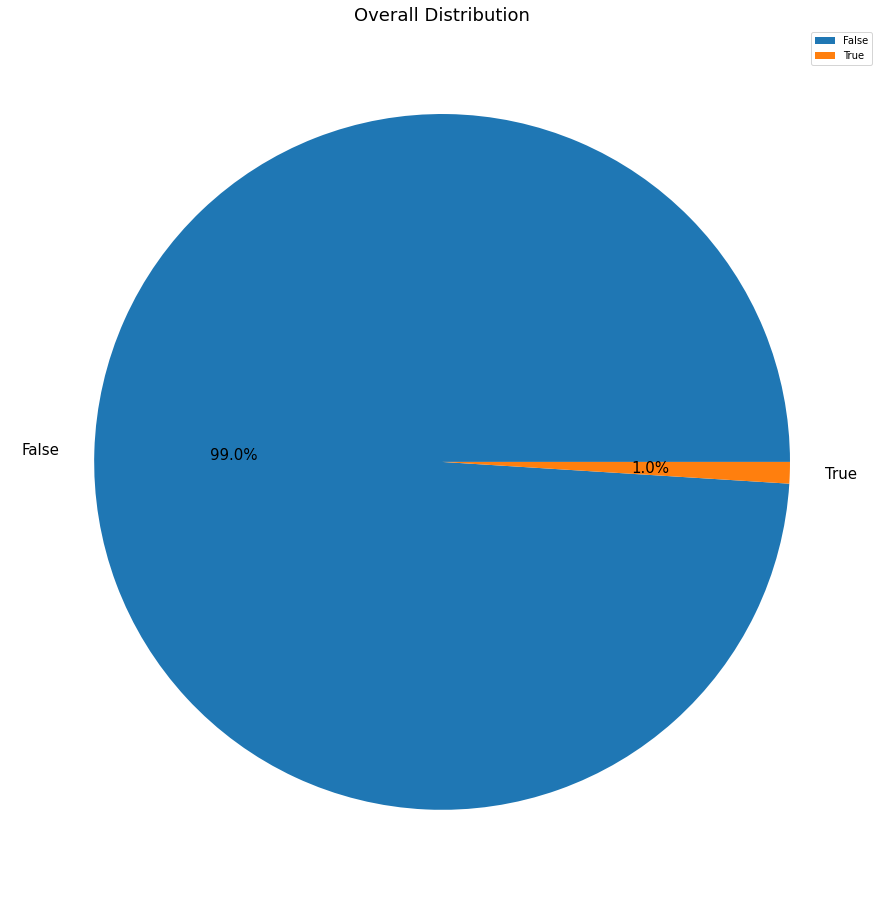

In [42]:
pie_chart1(df)

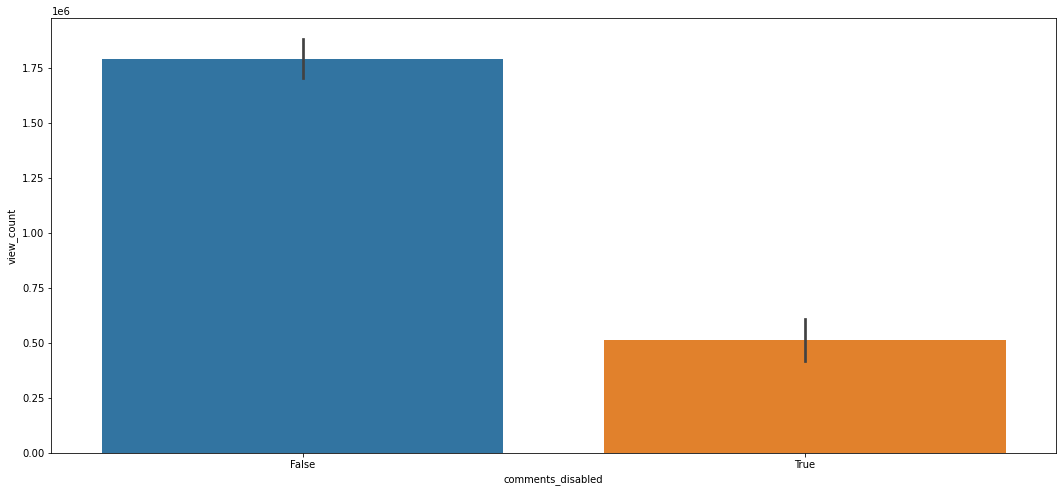

In [43]:
plt.figure(figsize=(18,8))

sns.barplot(data=df,x='comments_disabled',y='view_count')
plt.show()

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Does comment count effect views per video

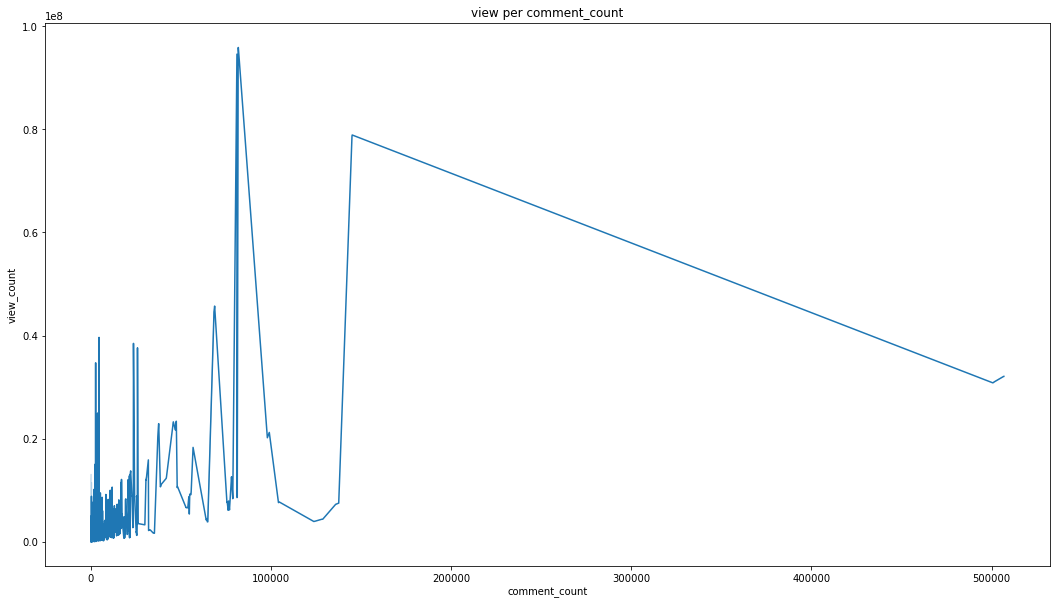

In [44]:
#the amount of comments effect the amoutn. of views 
df = df[~df.index.duplicated()]
plt.figure(figsize=(18,10))
sns.lineplot(data=df,x='comment_count',y='view_count')
plt.title('view per comment_count')
plt.show()

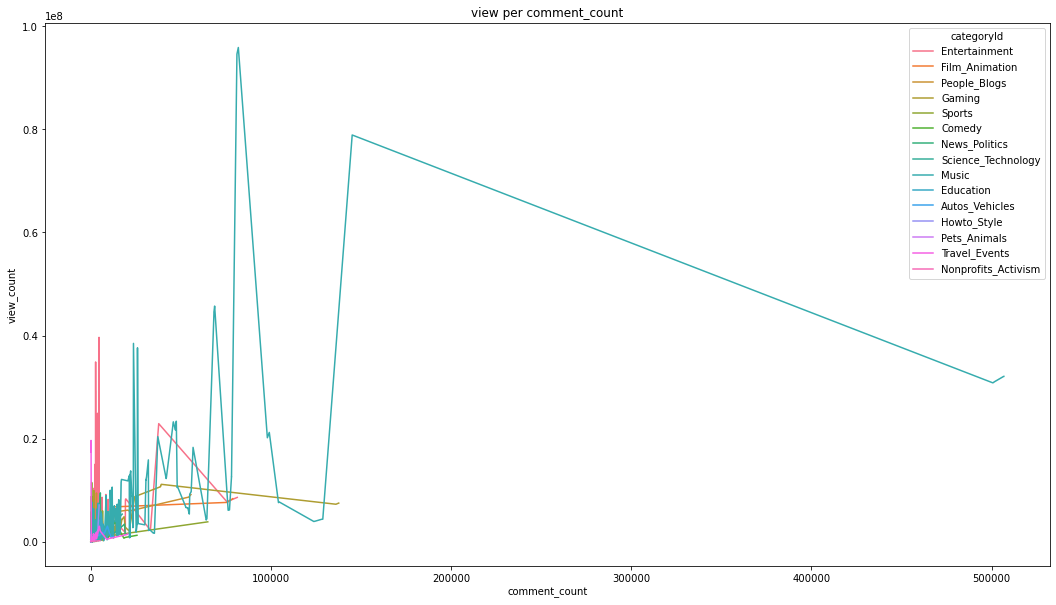

In [45]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.lineplot(data=df,x='comment_count',y='view_count',hue='categoryId')
plt.title('view per comment_count')
plt.show()

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# rating disabled effect views:

In [46]:
def pie_chart2(df):
    labels = pd.concat([df.ratings_disabled.value_counts(),df.ratings_disabled.value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    plt.figure(figsize=(16,16))
    mylabels = df['ratings_disabled']
    textprops = {"fontsize":15}
    textprops = {"fontsize":15}
    plt.pie(labels.percent, labels = labels.index, textprops=textprops, autopct='%.1f%%')
    plt.legend()
    plt.title('Overall Distribution',fontsize=18)
    plt.show() 

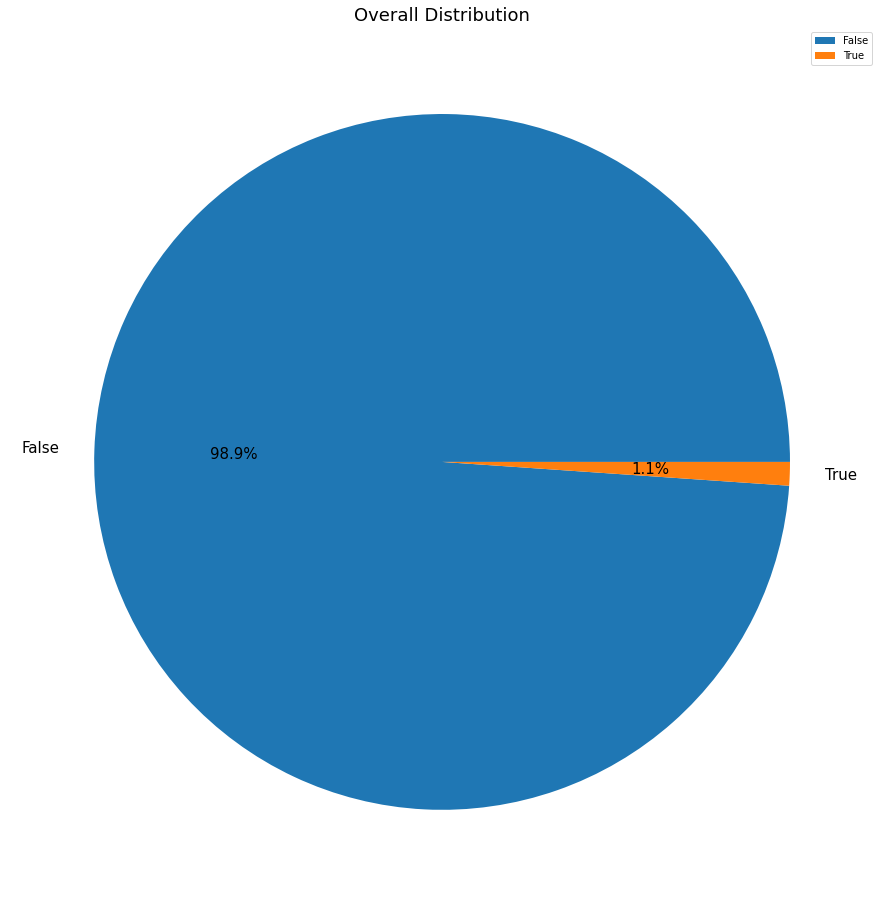

In [47]:
pie_chart2(df)

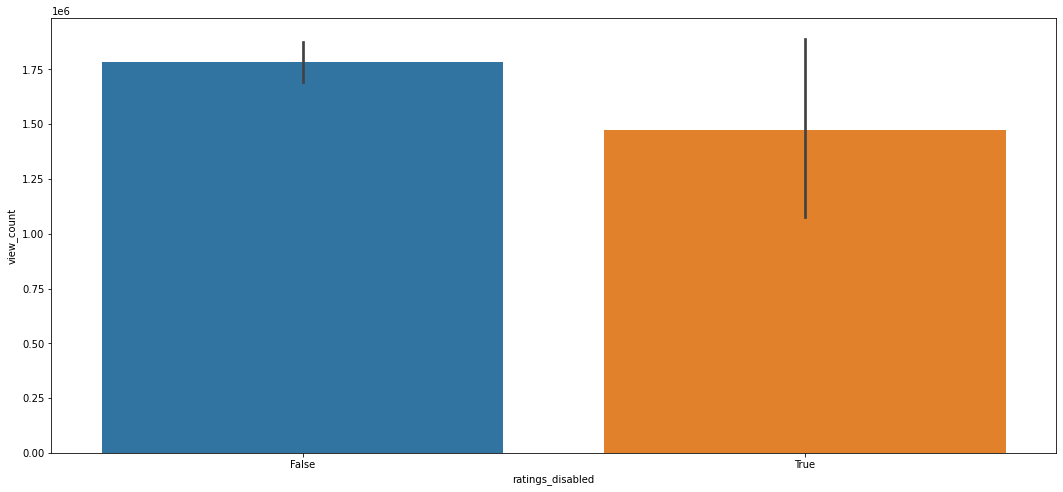

In [48]:
plt.figure(figsize=(18,8))

sns.barplot(data=df,x='ratings_disabled',y='view_count')
plt.show()

In [49]:
df.ratings_disabled.nunique()

2

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# categoryId to views... 
# Which video category has the largest number of trending videos?

In [50]:
#type of categorys
df.categoryId.unique()

array(['Entertainment', 'Film_Animation', 'People_Blogs', 'Gaming',
       'Sports', 'Comedy', 'News_Politics', 'Science_Technology', 'Music',
       'Education', 'Autos_Vehicles', 'Howto_Style', 'Pets_Animals',
       'Travel_Events', 'Nonprofits_Activism'], dtype=object)

In [51]:
#making categorid into actual category titles
# df.categoryId = df.categoryId.map({10: 'Music', 25: 'News_Politics', 20:'Gaming',24:'Entertainment',
#                                       17:'Sports',23:'Comedy',22:'People_Blogs',1:'Film_Animation',28:'Science_Technology',
#                                       2:'Autos_Vehicles',19:'Travel_Events',26:'Howto_Style',27:'Education'})

In [52]:
df.categoryId.unique()

array(['Entertainment', 'Film_Animation', 'People_Blogs', 'Gaming',
       'Sports', 'Comedy', 'News_Politics', 'Science_Technology', 'Music',
       'Education', 'Autos_Vehicles', 'Howto_Style', 'Pets_Animals',
       'Travel_Events', 'Nonprofits_Activism'], dtype=object)

In [53]:
def pie_chart2(df):
    labels = pd.concat([df.categoryId.value_counts(),df.categoryId.value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    plt.figure(figsize=(16,16))
    mylabels = df['categoryId']
    textprops = {"fontsize":14}
    textprops = {"fontsize":14}
    plt.pie(labels.percent, labels = labels.index, textprops=textprops, autopct='%.1f%%')
    plt.legend(loc='upper left')
    plt.title('Overall Distribution',fontsize=18)
    plt.show() 

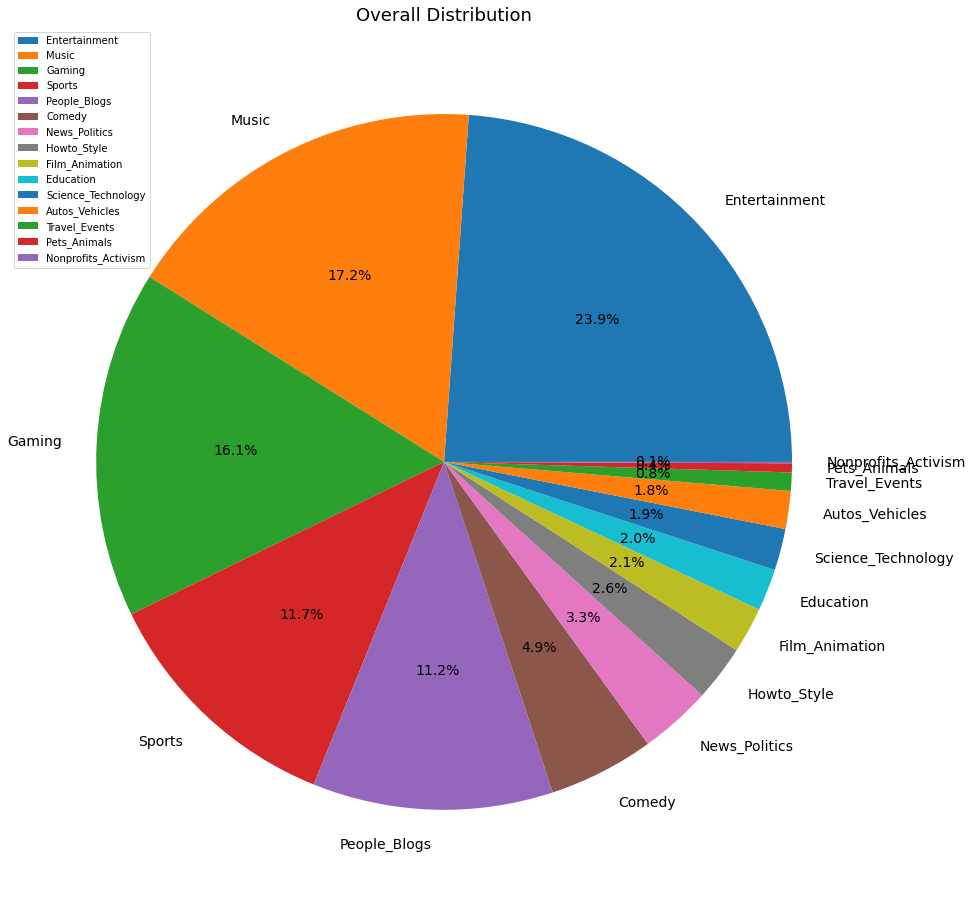

In [54]:
#overall count of category
pie_chart2(df)

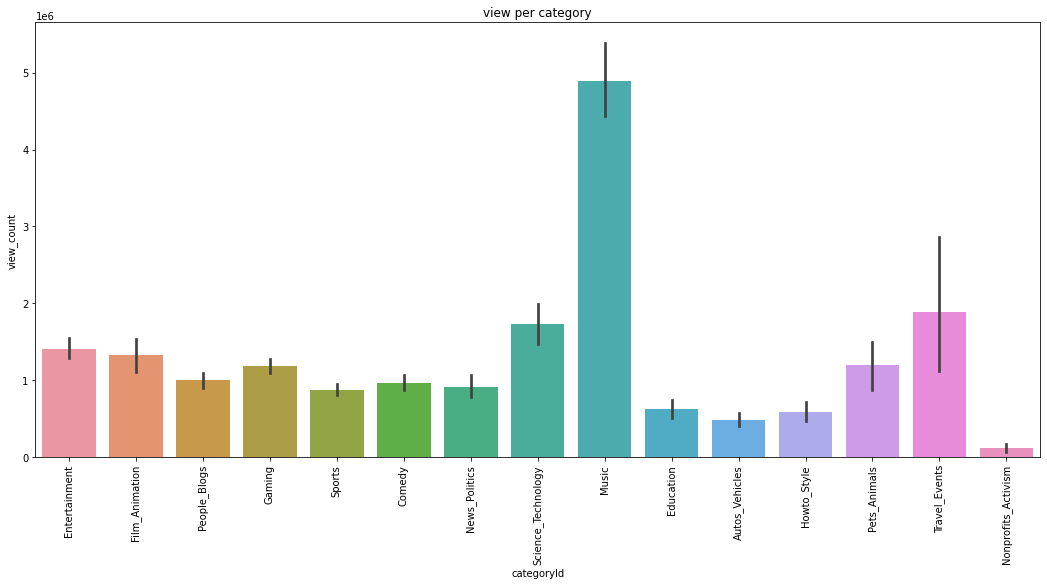

In [55]:
plt.figure(figsize=(18,8))
sns.barplot(data=df,x='categoryId',y='view_count')
plt.title('view per category')
plt.xticks(rotation=90)
plt.show()

In [56]:
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 10,rotation=90)

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12,rotation=90)
        
# def pie_chart1(df):
#     labels = pd.concat([df.clean_lang.value_counts(),df.clean_lang.value_counts(normalize=True)], axis=1)
#     labels.columns = ['n', 'percent']
#     plt.figure(figsize=(16,16))
#     mylabels = df['clean_lang']
#     textprops = {"fontsize":15}
#     textprops = {"fontsize":15}
#     plt.pie(labels.percent, labels = labels.index, textprops=textprops, autopct='%.1f%%')
#     plt.legend()
#     plt.title('Overall Language Distribution',fontsize=18)
#     plt.show() 
    

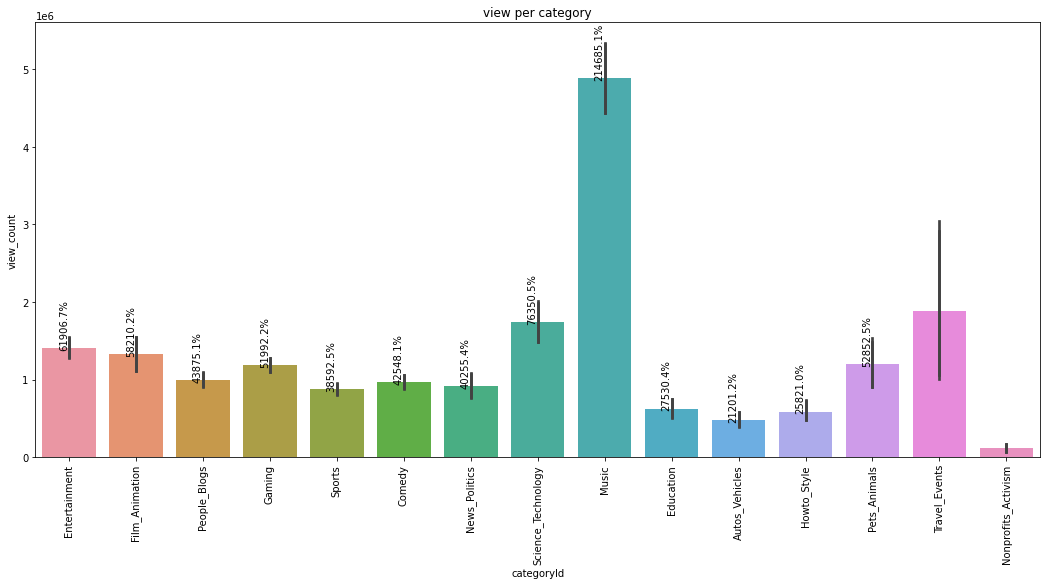

In [57]:
#fix the percentages
plt.figure(figsize=(18,8))
sns.barplot(data=df,x='categoryId',y='view_count')
plt.title('view per category')
plt.xticks(rotation=90)
ax=sns.barplot(data=df,x='categoryId',y='view_count')
with_hue(ax, df.categoryId,1,13)

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# duration effecct view count !
# Does that information change based on length, category, and global region?


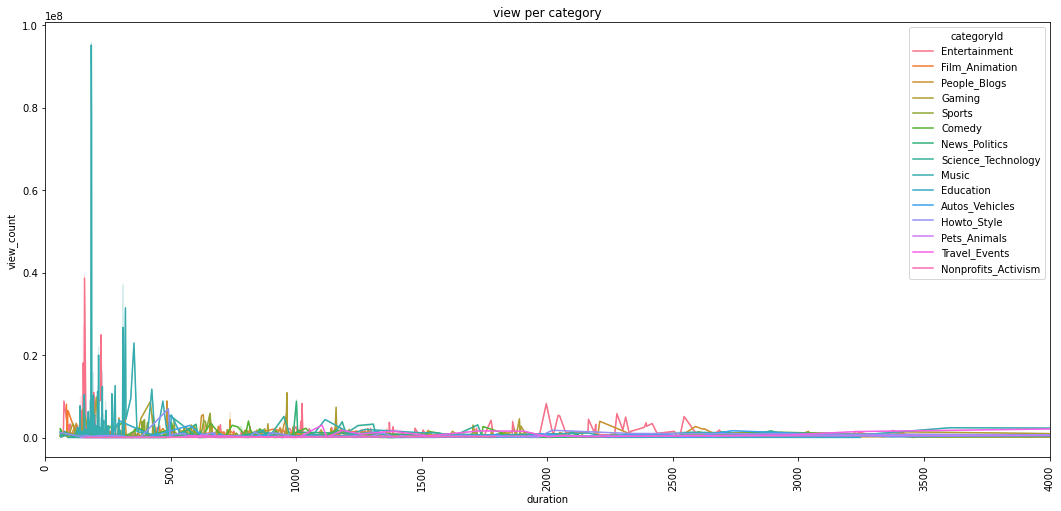

In [58]:
plt.figure(figsize=(18,8))
sns.lineplot(data=df,x='duration',y='view_count',hue='categoryId')
plt.title('view per category')
plt.xticks(rotation=90)
plt.xlim(0,4000)
plt.show()

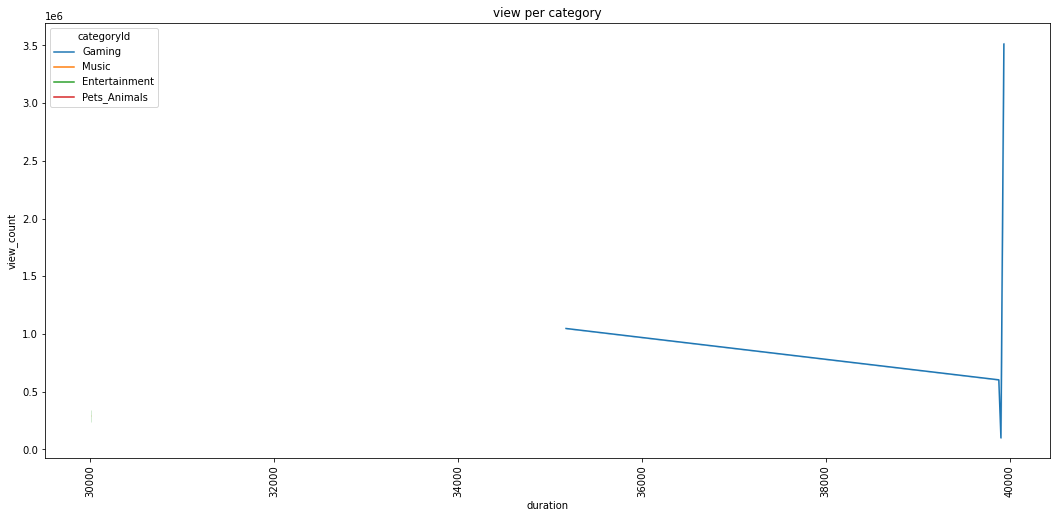

In [59]:
#top 25 rank videos
plt.figure(figsize=(18,8))
sns.lineplot(
    x='duration',
    y='view_count',
    hue='categoryId',
    data=df.nlargest(25, 'duration'))
plt.title('view per category')
plt.xticks(rotation=90)
plt.show()

/var/folders/48/yvmx1zqx06d_njrv4sh14c6m0000gn/T/ipykernel_21515/3005040862.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['8','8mins','16mins','24mins','32mins','40mins','48mins','56mins'])


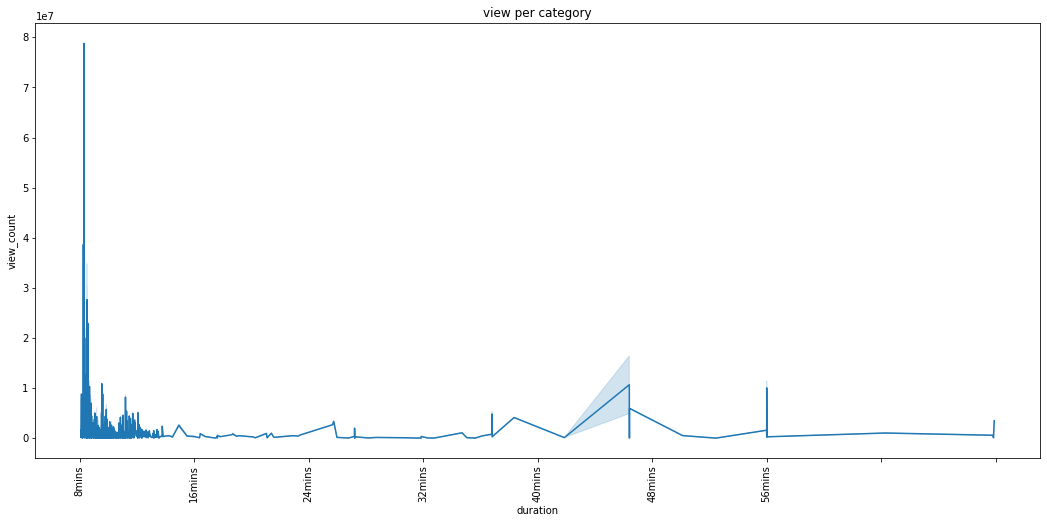

In [60]:
plt.figure(figsize=(18,8))
g=sns.lineplot(data=df,x='duration',y='view_count')
plt.title('view per category')
g.set_xticklabels(['8','8mins','16mins','24mins','32mins','40mins','48mins','56mins'])
plt.xticks(rotation=90)
plt.show()

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# What is a viral video? How long does it a take for a video to go viral?Create feature based on virality

In [61]:
df.publishedAt.nunique()

1987

(19288.656255208334, 19297.656255208334)

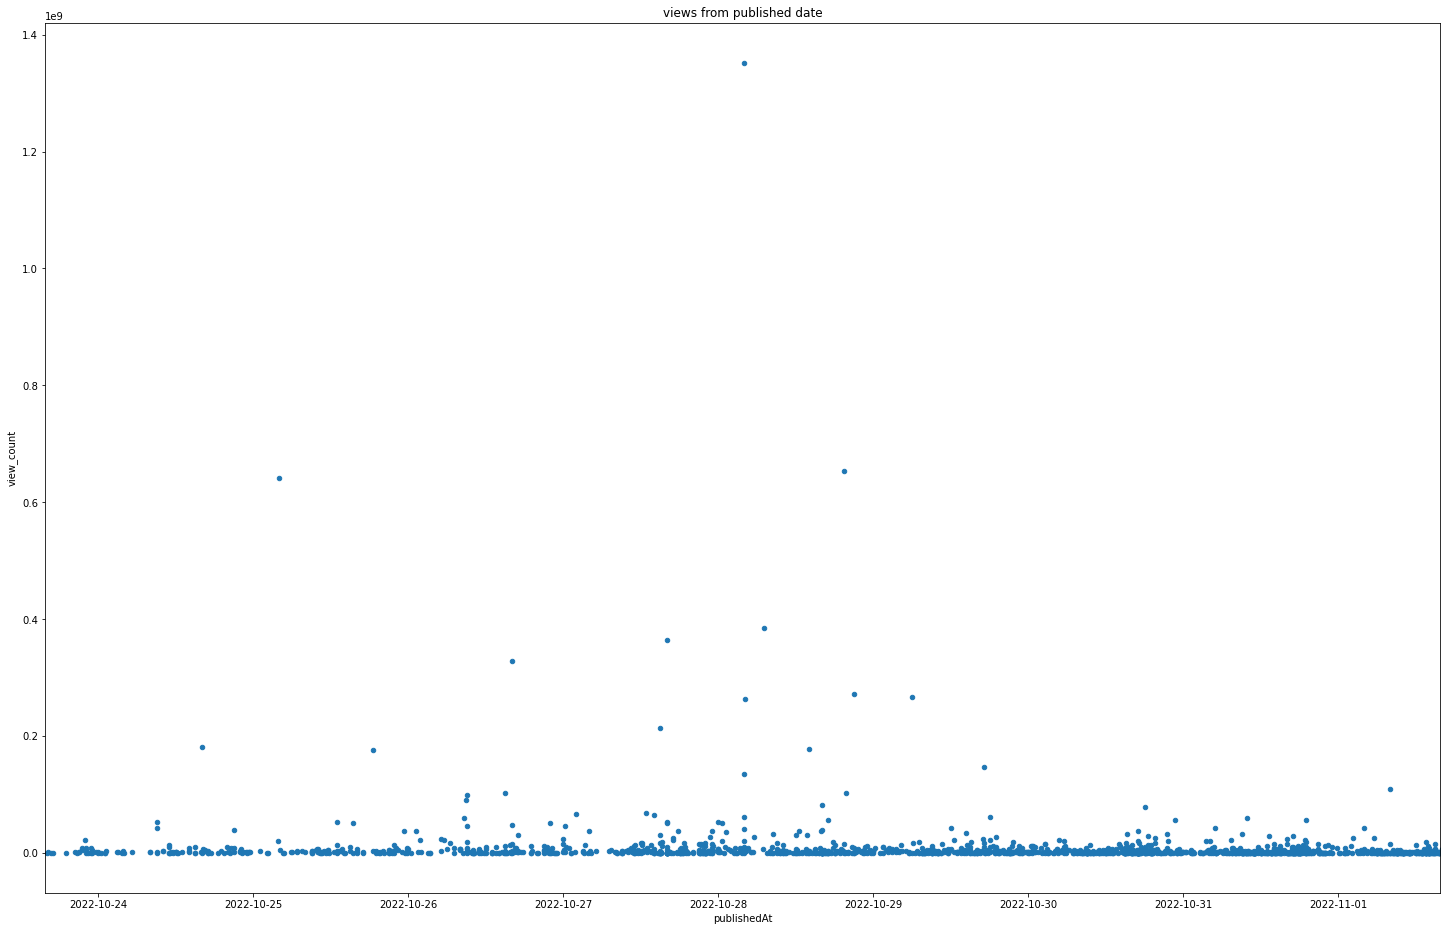

In [62]:
plt.rcParams["figure.figsize"] = (25,16)
publisheds = df.groupby('publishedAt')['view_count'].sum().reset_index()
publisheds.plot(kind='scatter', x='publishedAt', y='view_count', title='views from published date')
plt.xlim(19288.656255208334,19297.656255208334)

<AxesSubplot:title={'center':'views from published date'}, xlabel='publishedAt', ylabel='view_count'>

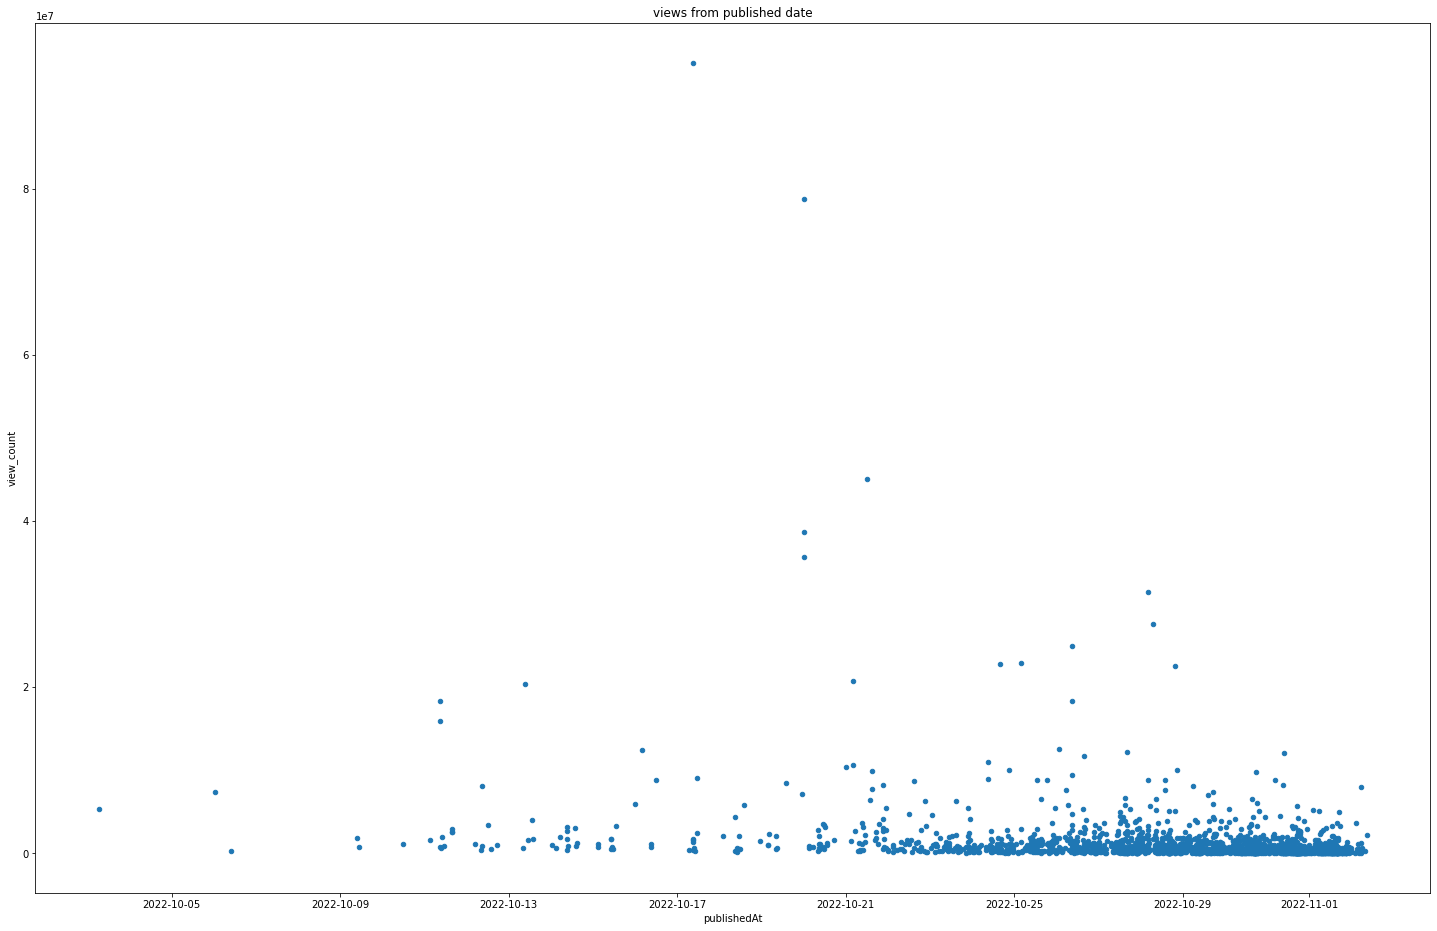

In [63]:
plt.rcParams["figure.figsize"] = (25,16)
publisheds = df.groupby('publishedAt')['view_count'].mean().reset_index()
publisheds.plot(kind='scatter', x='publishedAt', y='view_count', title='views from published date')

<AxesSubplot:title={'center':'views from trending_date'}, xlabel='trending_date', ylabel='view_count'>

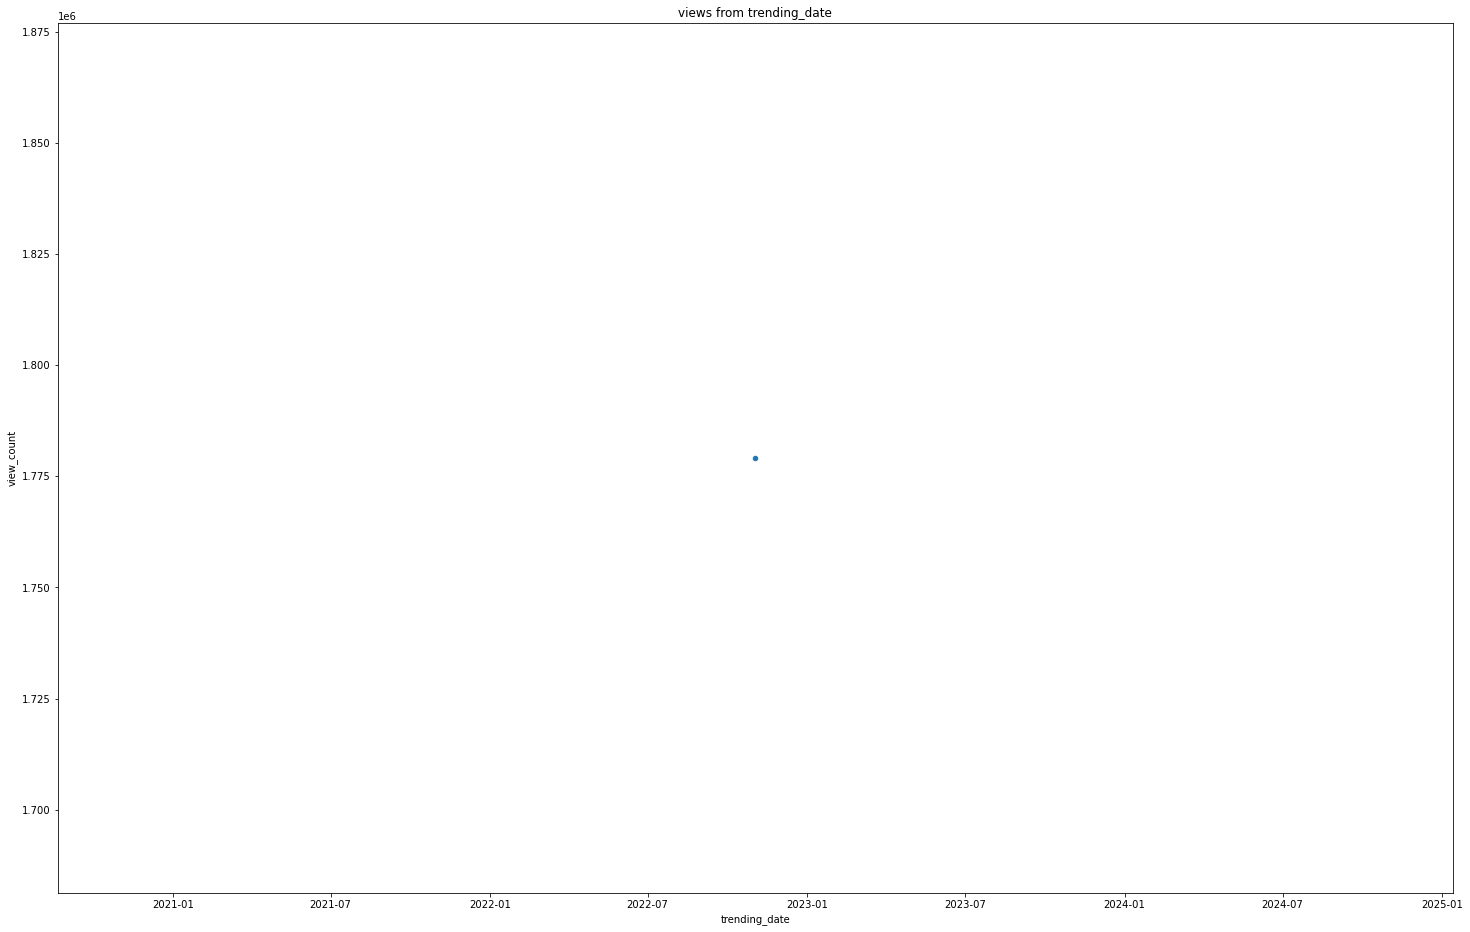

In [64]:
plt.rcParams["figure.figsize"] = (25,16)
publisheds = df.groupby('trending_date')['view_count'].mean().reset_index()
publisheds.plot(kind='scatter', x='trending_date', y='view_count', title='views from trending_date')

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Is rank effect by view count??:

In [65]:
#TREN 
# plt.rcParams["figure.figsize"] = (25,16)
# new_Greenland = df.groupby('trending_date')['view_count'].mean().reset_index()
# new_Greenland.plot(kind='line', x='trending_date', y='view_count', title='views from published date')

<AxesSubplot:xlabel='view_count', ylabel='rank'>

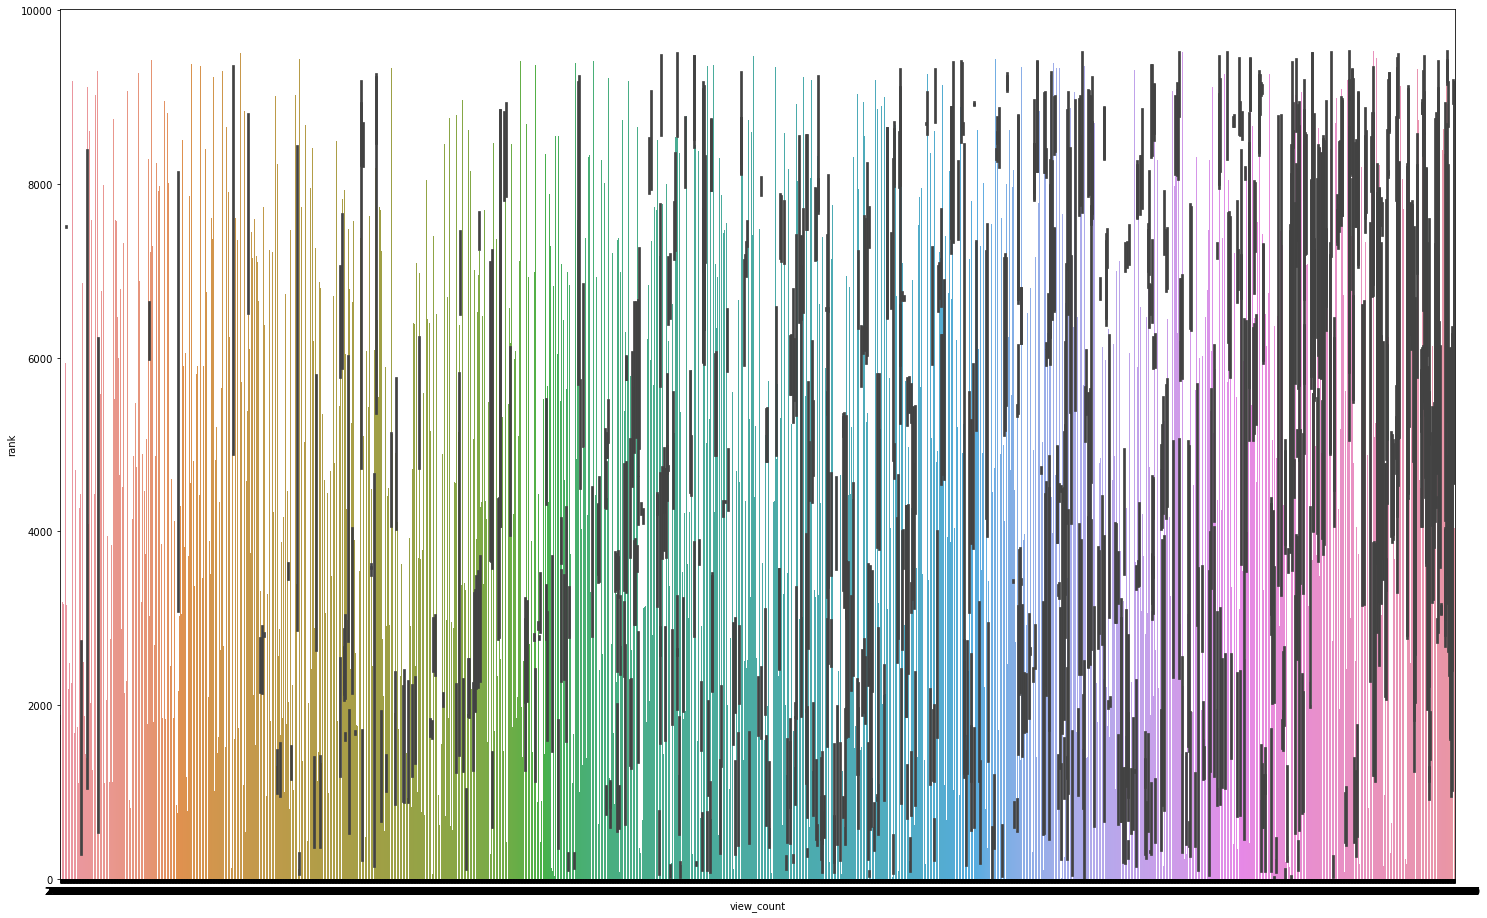

In [66]:
sns.barplot(data=df,x='view_count',y='rank')

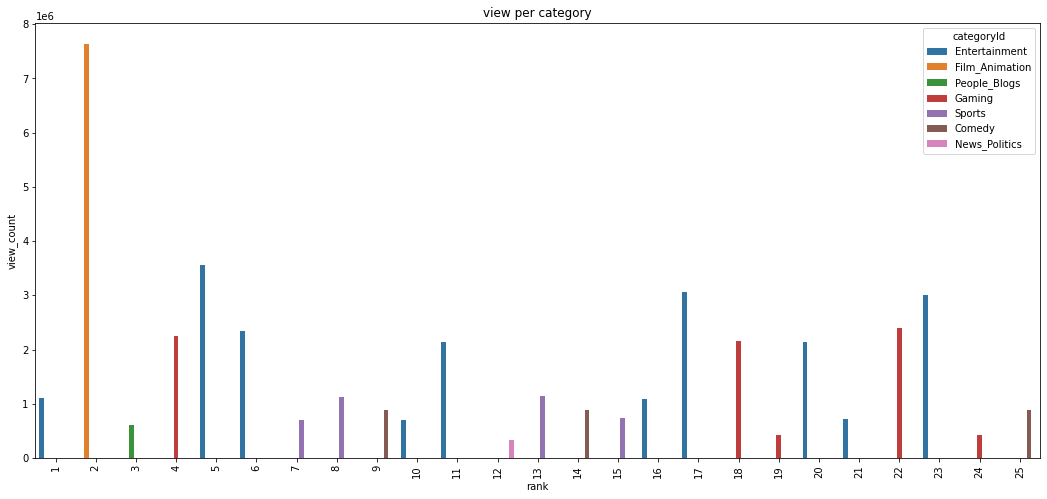

In [67]:
plt.figure(figsize=(18,8))
sns.barplot(
    x='rank',
    y='view_count',
    hue='categoryId',
    data=df.sort_values('rank', ascending=True).head(25))
plt.title('view per category')
plt.xticks(rotation=90)
plt.show()

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Common words on top 25 videos:

In [68]:

import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata
import pandas as pd
import nltk
def remove_stopwords(article_processed,words_to_add=[],words_to_remove=[]):
    ''' 
    takes in string, and two lists
    creates list of words to remove from nltk, modifies as dictated in arguements
    prints result of processing
    returns resulting string
    '''
    from nltk.corpus import stopwords
    #create the stopword list
    stopwords_list = stopwords.words("english")
    #modify stopword list
    [stopwords_list.append(word) for word in words_to_add]
    [stopwords_list.remove(word) for word in words_to_remove]
    #remove using stopword list
    words = article_processed.split()
    filtered_words = [w for w in words if w not in stopwords_list]
    #filtered_words =[word for word in article_processed if word not in stopwords_list]
    #print("removed ",len(article_processed)-len(filtered_words), "words")
    #join back
    article_without_stopwords = " ".join(filtered_words)
    return article_without_stopwords

def lemmatize(article):
    ''' 
    input article
    makes object, applies to string, and returns results
    '''
    import nltk
    #create the lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()
    #use lemmatizer
    lemmatized = [wnl.lemmatize(word) for word in article.split()]
    #join words back together
    article_lemmatized = " ".join(lemmatized)
    return article_lemmatized

def stem(article):
    ''' 
    input string
    create object, apply it to the each in string, rejoin and return
    '''
    import nltk
    #create porter stemmer
    ps = nltk.porter.PorterStemmer()
    stems = [ps.stem(word) for word in article.split()]
    #join words back together
    article_stemmed = " ".join(stems)
    return article_stemmed

def tokenize(article0):
    ''' 
    input string
    creates object, returns string after object affect
    '''
    import nltk
    #create the tokenizer
    tokenize = nltk.tokenize.ToktokTokenizer()
    #use the tokenizer
    article = tokenize.tokenize(article0,return_str=True)
    return article

def basic_clean(article0):
    ''' 
    input string
    lowers cases, makes "normal" characters, and removes anything not expected
    returns article
    '''
    import unicodedata
    import re
    #lower cases
    if isinstance(article0, float):
        article = str(article0).lower()
    else:
        article = article0.lower()
    ## decodes to change to "normal" characters after encoding to ascii from a unicode normalize
    article = unicodedata.normalize("NFKD",article).encode("ascii","ignore").decode("utf-8")
    # removes anything not lowercase, number, single quote, or a space
    article = re.sub(r'[^a-z0-9\'\s]','',article)
    return article



In [69]:
# cleaning the data for world cloud
df = df[df.description.isna()==False]
df["clean"] = [remove_stopwords(tokenize(basic_clean(each))) for each in df.description]
df["stemmed"] = df.clean.apply(stem)
df["lemmatized"] = df.clean.apply(lemmatize)

In [70]:
df.head()

,index,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,...,num_of_tags,word_bank,cleaned_tags,cleaned_desc,title_in_description,title_in_tags,pct_tags_in_description,clean,stemmed,lemmatized
0,0,sWwHWK7OYJ8,[ENG][아형✪하이라이트] (여자)아이들 완전체 떴다↗ 멋짐 폭발♥ 5인 5색 토...,2022-10-29 13:26:44+00:00,아는형님 Knowingbros,Entertainment,2022-11-02 00:00:00+00:00,아는 형님 형님 형님 학교 미연 민니 소연 우기 슈화 아이들 여자아이들 강호동 이수...,1098919,19090,...,67,"[[, 아형, ✪, 하이라이트, 여자)아이들, 완전체, 떴다, ↗, 멋짐, 폭발, ...","{아이들저작권, 슈화직캠, Nxde직캠 Node, 여자아이들아는형님 아이들아는형님 ...","{50분, 공홈에서, 토요일, 토크 모음.zip#아는형님, 리플레이, 5색, 모음....",0,0,0.013889,5 5 zip httpstvjtbccokrjtbcbros httpstvingonel...,5 5 zip httpstvjtbccokrjtbcbro httpstvingoneli...,5 5 zip httpstvjtbccokrjtbcbros httpstvingonel...
600,0,4xl9KfUg8Lc,Pathaan | Official Teaser | Shah Rukh Khan | D...,2022-11-02 05:31:19+00:00,YRF,Film_Animation,2022-11-02 00:00:00+00:00,shah rukh khan shahrukh khan srk shah rukh kha...,7638460,764869,...,23,"[special, surprise, for, very, special, day, P...","{srk, deepika, shahrukh, अब्राहम, bollywood, 2...","{NewMovie2023, Instagram: Instagram/yrf► Visit...",0,0,0.013889,special surprise special day pathaan teaser ce...,special surpris special day pathaan teaser cel...,special surprise special day pathaan teaser ce...
7215,0,vzxI6U_l72g,ヒカルくんとようやく戦えるときが来ました。,2022-10-31 10:30:10+00:00,ロードシルク,People_Blogs,2022-11-02 00:00:00+00:00,シルクロード ロードシルク Fischer’s フィッシャーズ 個人 チャンネル 個チャン ...,613365,15756,...,32,[ヒカルくんhttps://www.youtube.com/channel/UCaminwG...,"{大乱闘, ルキナ, 漫画, 特技, スマブラSP, 爬虫類, Fischer, スマブラ,...","{http://www.epidemicsound.com【一部の動画・静止画素材提供元, ...",0,0,0.013889,httpswwwyoutubecomchannelucaminwg9mto4slyec3s6...,httpswwwyoutubecomchannelucaminwg9mto4slyec3s6...,httpswwwyoutubecomchannelucaminwg9mto4slyec3s6...
1752,0,AcznL5daQvA,Fear PIRATE CHAMPION's Spear! Clash of Clans S...,2022-11-01 08:00:04+00:00,Clash of Clans,Gaming,2022-11-02 00:00:00+00:00,clash of clans COC Clash of Clans Gameplay Cla...,2258144,44366,...,28,"[Ahoy, ⚓, new, month, of, Season, Challenges, ...","{season, rama, Town, Gameplay, Wars, pirate, r...","{mighty, en, favorite, parents#clashofclans, m...",0,0,0.013889,ahoy new month season challenges better steer ...,ahoy new month season challeng better steer cl...,ahoy new month season challenge better steer c...
4106,0,ZYO1Z4Ajdvw,ЗА МНОЙ СЛЕДИЛИ?! ТОТ САМЫЙ ЛЕС В ЯПОНИИ! Ghos...,2022-10-31 20:54:41+00:00,Дима Масленников (Pognali Show),Entertainment,2022-11-02 00:00:00+00:00,ЗА МНОЙ СЛЕДИЛИ?! ТОТ САМЫЙ ЛЕС В ЯПОНИИ ТОТ С...,3552774,325414,...,32,"[Оформи, подписку, на, VK, Музыку, за, 0, рубл...","{GHOSTBUSTER, лесу, камеру, В, ghostbusters, М...","{за, рублей, 0, https://vk.com/pognalishowTik-...",0,0,0.013889,vk 0 httpsvkccchsqel httpsmusicvkcompromomtlin...,vk 0 httpsvkccchsqel httpsmusicvkcompromomtlin...,vk 0 httpsvkccchsqel httpsmusicvkcompromomtlin...


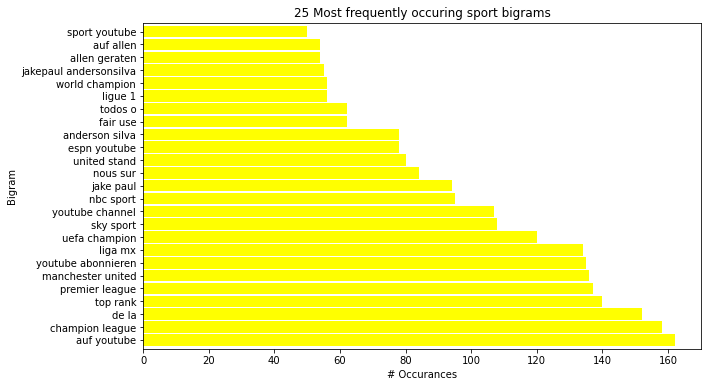

In [71]:
Sports = ' '.join(df[df.categoryId == 'Sports'].lemmatized).split()
top_20_ham_bigrams = (pd.Series(nltk.ngrams(Sports, 2))
                      .value_counts()
                      .head(25))
top_20_ham_bigrams.sort_values(ascending=False).plot.barh(color='yellow', width=.9, figsize=(10, 6))

plt.title('25 Most frequently occuring sport bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

    # make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [72]:
Entertainment = ' '.join(train[train.categoryId == 'Entertainment'].lemmatized).split()
top_20_ham_bigrams = (pd.Series(nltk.ngrams(Ruby, 2))
                      .value_counts()
                      .head(25))
top_20_ham_bigrams.sort_values(ascending=False).plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('25 Most frequently occuring Entertainment bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

    # make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

NameError: name 'train' is not defined

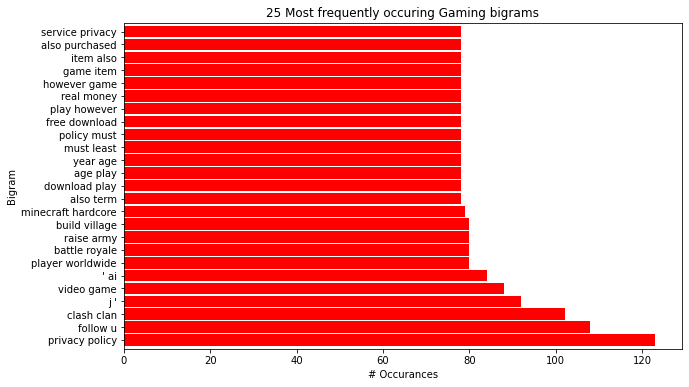

In [73]:
Ruby = ' '.join(df[df.categoryId == 'Gaming'].lemmatized).split()
top_20_ham_bigrams = (pd.Series(nltk.ngrams(Ruby, 2))
                      .value_counts()
                      .head(25))
top_20_ham_bigrams.sort_values(ascending=False).plot.barh(color='red', width=.9, figsize=(10, 6))

plt.title('25 Most frequently occuring Gaming bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

    # make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

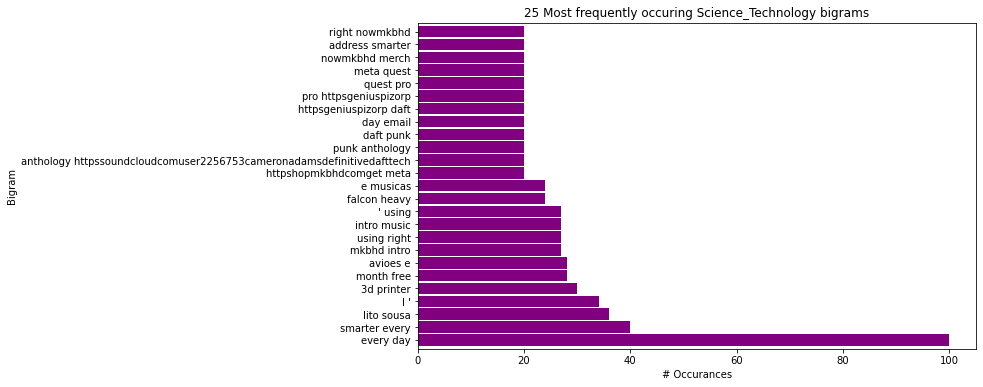

In [74]:
Ruby = ' '.join(df[df.categoryId == 'Science_Technology'].lemmatized).split()
top_20_ham_bigrams = (pd.Series(nltk.ngrams(Ruby, 2))
                      .value_counts()
                      .head(25))
top_20_ham_bigrams.sort_values(ascending=False).plot.barh(color='purple', width=.9, figsize=(10, 6))

plt.title('25 Most frequently occuring Science_Technology bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

    # make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Comparing like from all categorys to other caregorys

In [75]:
def explore_ttest_lang_setcount(df,population_name="categoryId",numerical_feature="likes"):
    ''' 
    input df dataset and two strings (discrete and continous)
    does a ttest prints results, plots relation
    returns nothing
    '''
    
    #plot the results
    plt.figure(figsize=(25,25))
    plt.suptitle(f"Sample Values Compared for Non-Repeating Words", fontsize=12, y=0.99)
    i=0
    for feature in df[population_name].unique():
        temp1=df.copy()
        #plots out a grouping of the features
        i+=1
        ax = plt.subplot(5,3,i)
        temp1[population_name] = np.where(temp1[population_name]==feature,feature,"Other categoryId")
        temp1[[numerical_feature,population_name]].groupby(population_name).agg("mean").plot.bar(rot=0,color="blue",edgecolor="white",linewidth=5,ax=ax)
        ax.axhline(y=temp1[numerical_feature].mean(),label=f"Mean {(round(temp1[numerical_feature].mean(),3))}",color="red",linewidth=3)
        ax.set_ylabel("% of Non-Repeating Words")
        plt.legend()
        ax.set_title(f"{feature} means for likes",fontsize=8)
    plt.show()

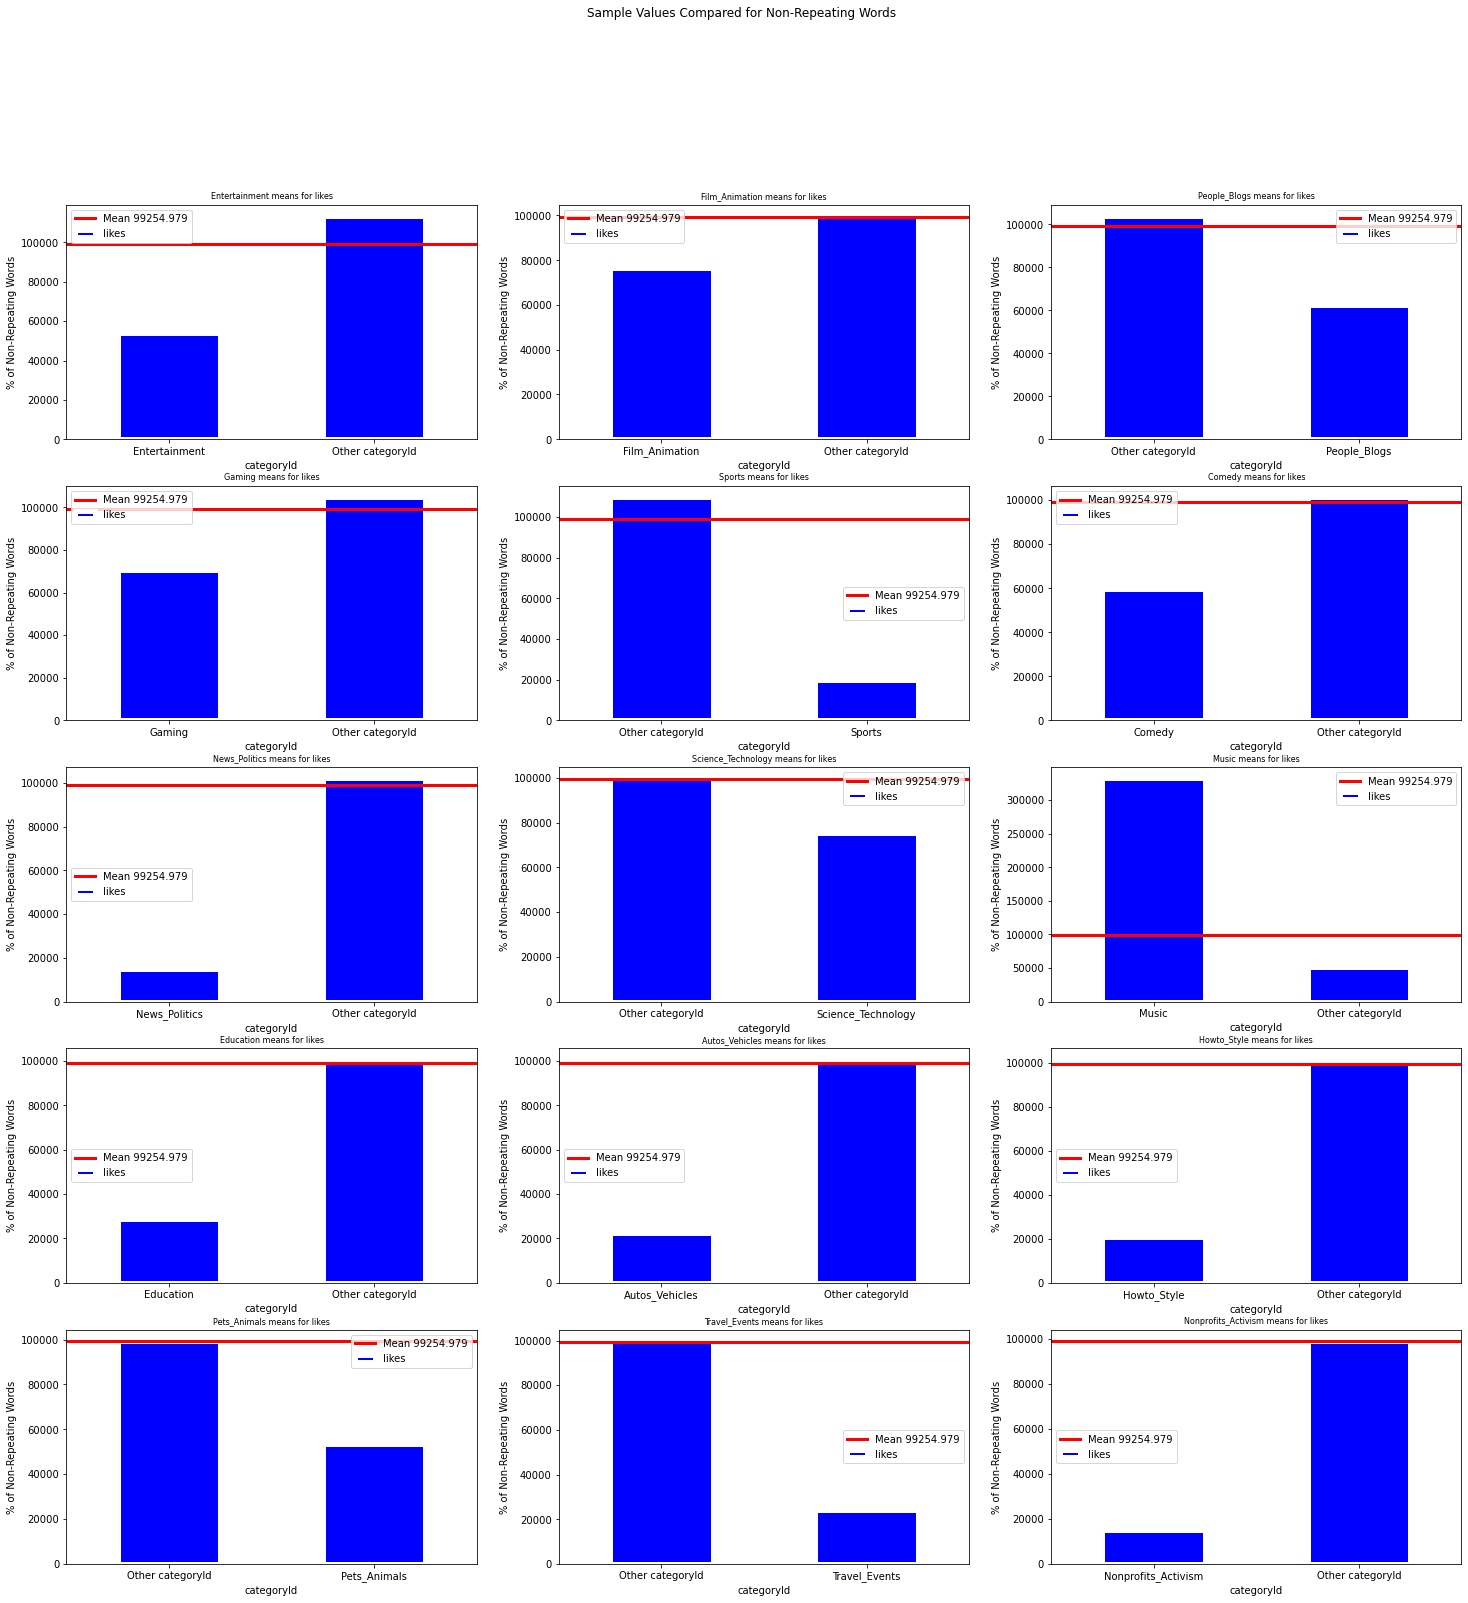

In [76]:
explore_ttest_lang_setcount(df)

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# word count from all categoryId Obtain from lemmatized:

In [77]:
def graph2(df):
    lang_dict={"Language":[],"Words":[]}
    for lang in df["categoryId"].unique():
        lang_dict["Language"].append(lang)
        lang_dict["Words"].append((" ".join(df[df["categoryId"]==lang]["lemmatized"])).replace("'","").split())
    lang = pd.DataFrame(lang_dict)
    most_common_list=[]
    for i,each in enumerate(lang["Language"].unique()):
        looped_series = pd.Series(lang["Words"].loc[i]).value_counts()
        most_common = looped_series[looped_series > looped_series.quantile(.95)]
        most_common_list.append(most_common[:5].index.tolist())
    lang["most_common"] = pd.Series(most_common_list)
    lang["count_set_words"] = lang["Words"].apply(set).apply(len)
    sns.catplot(data=lang, x="count_set_words", y="Language", kind="bar",height=11,aspect=1.5)
    plt.title('Total count of words')
    plt.show()
    print(lang.count_set_words)

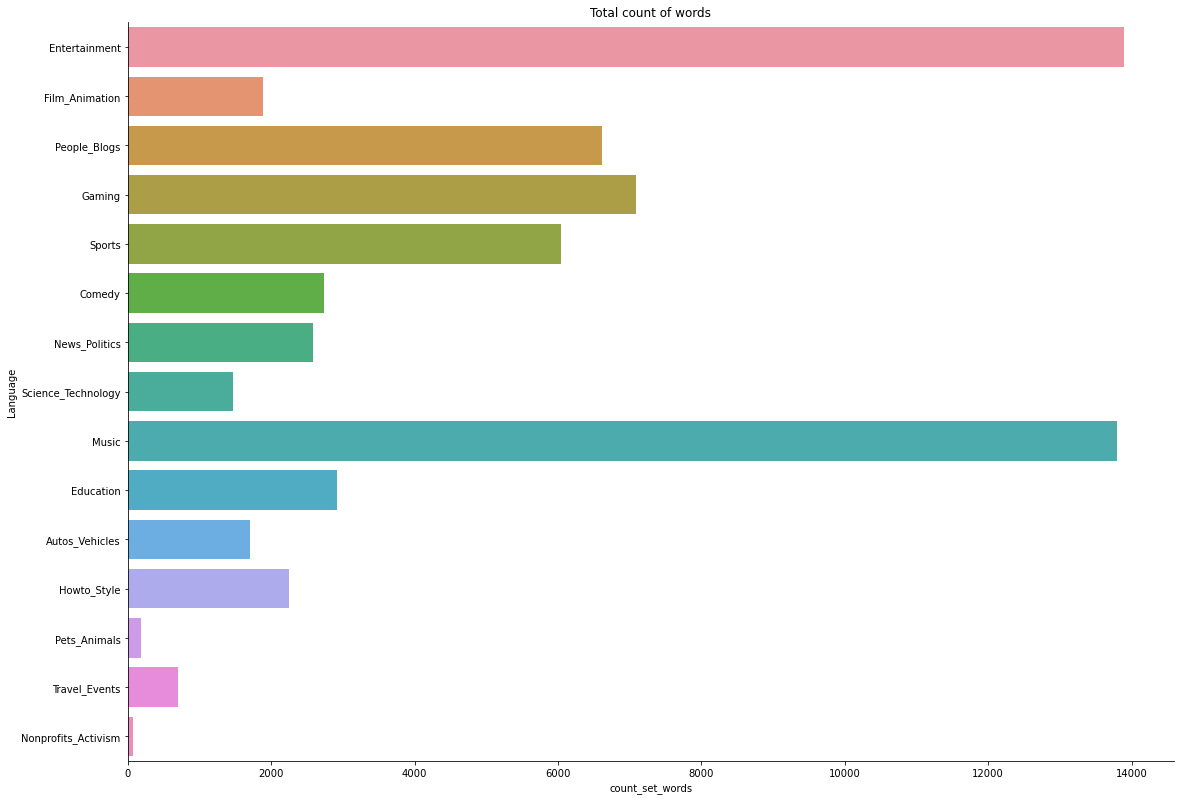

0     13892
1      1883
2      6620
3      7095
4      6047
5      2733
6      2581
7      1464
8     13796
9      2914
10     1701
11     2247
12      179
13      703
14       71
Name: count_set_words, dtype: int64


In [78]:
graph2(df)

In [79]:
def graph3(df):
    lang_dict={"Language":[],"Words":[]}
    for lang in df["categoryId"].unique():
        lang_dict["Language"].append(lang)
        lang_dict["Words"].append((" ".join(df[df["categoryId"]==lang]["lemmatized"])).replace("'","").split())
    lang = pd.DataFrame(lang_dict)
    most_common_list=[]
    for i,each in enumerate(lang["Language"].unique()):
        looped_series = pd.Series(lang["Words"].loc[i]).value_counts()
        most_common = looped_series[looped_series > looped_series.quantile(.95)]
        most_common_list.append(most_common[:5].index.tolist())
    lang["most_common"] = pd.Series(most_common_list)
    lang["count_set_words"] = lang["Words"].apply(set).apply(len)
    sns.pointplot(data=lang, x="count_set_words", y="Language",errorbar=("pi", 100), capsize=.4, join=True, color=".5",)
    plt.title('Total count of words')
    plt.show()
    print(lang.count_set_words)

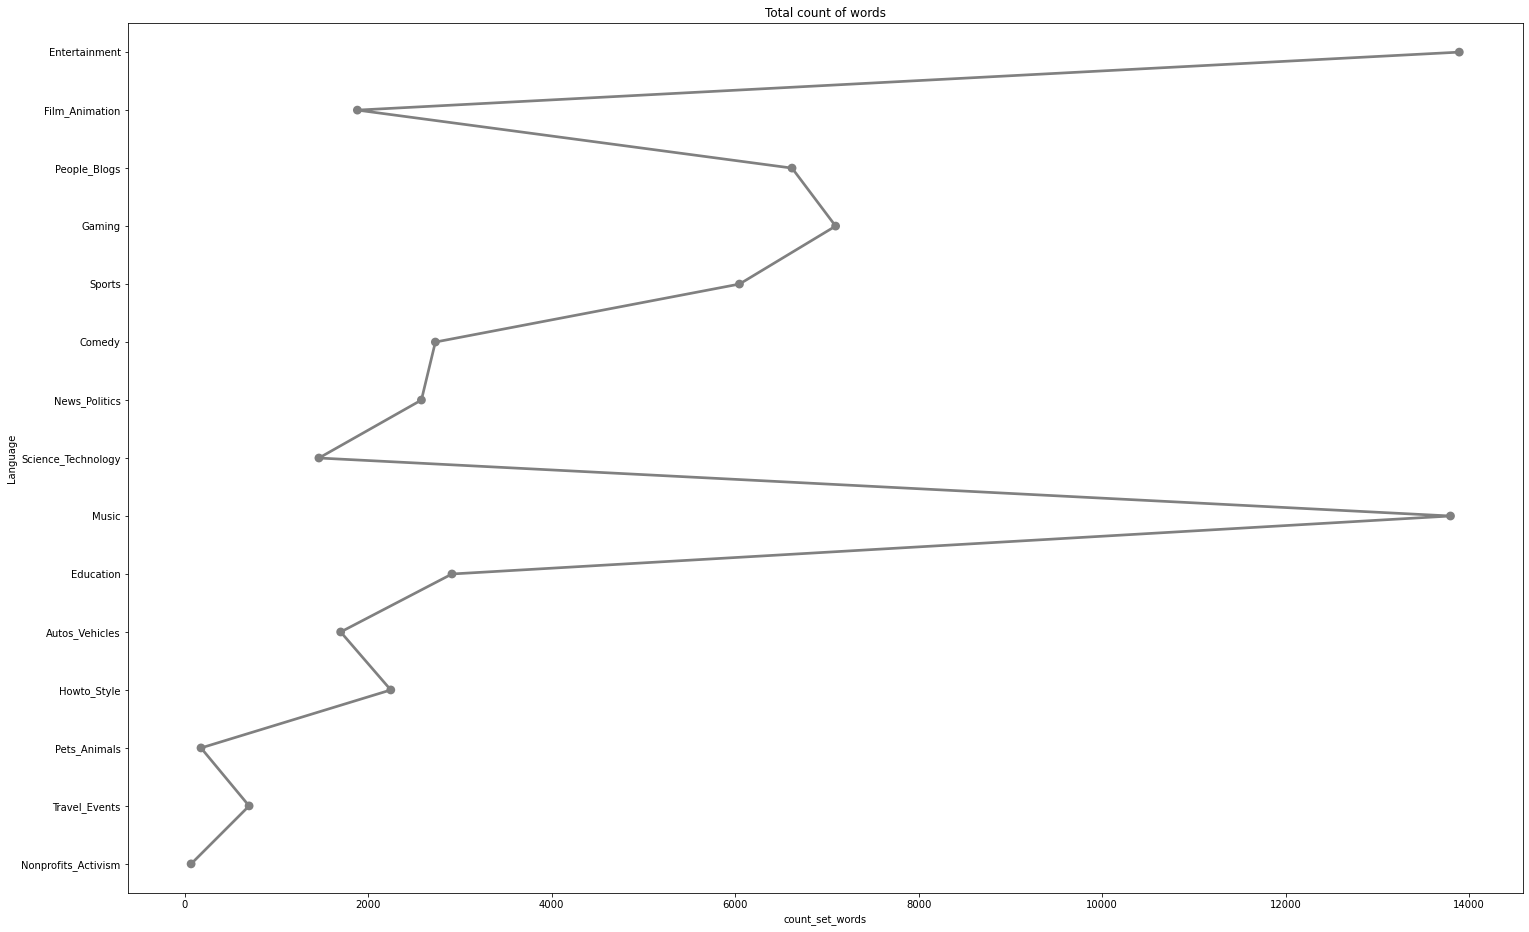

0     13892
1      1883
2      6620
3      7095
4      6047
5      2733
6      2581
7      1464
8     13796
9      2914
10     1701
11     2247
12      179
13      703
14       71
Name: count_set_words, dtype: int64


In [80]:
graph3(df)

# Checking different kind of regions

<AxesSubplot:title={'center':'view per category/region'}, xlabel='categoryId', ylabel='view_count'>

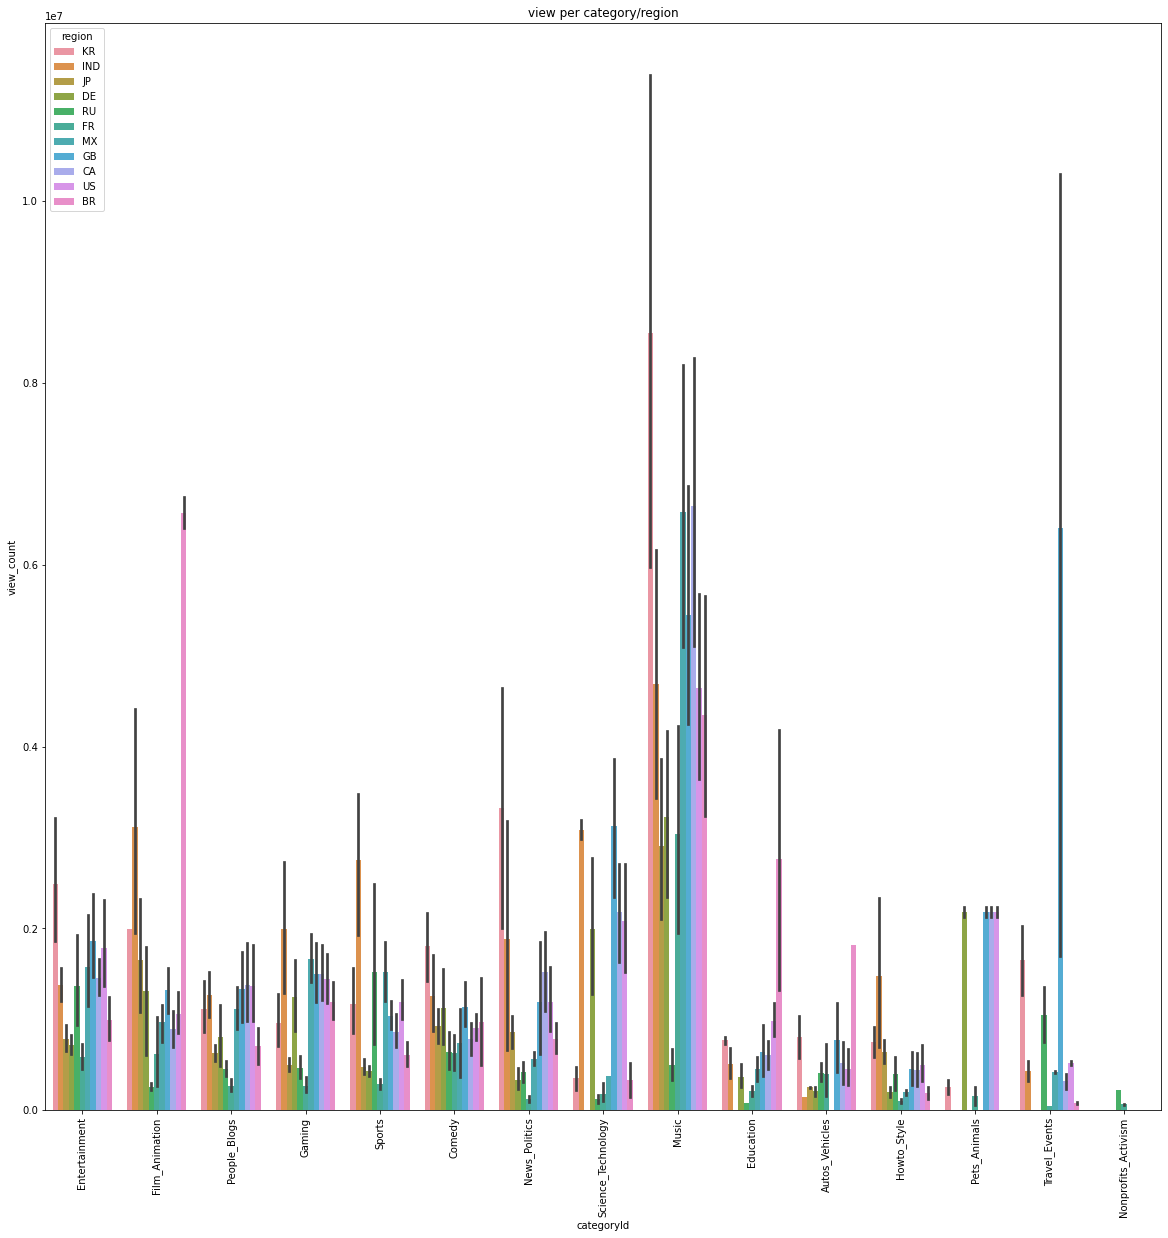

In [81]:
#fix the percentages
plt.figure(figsize=(20,20))
plt.title('view per category/region')
plt.xticks(rotation=90)
sns.barplot(data=df,x=df.categoryId, y=df.view_count,hue=df.region)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 95.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 73.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 91.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 94.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categori

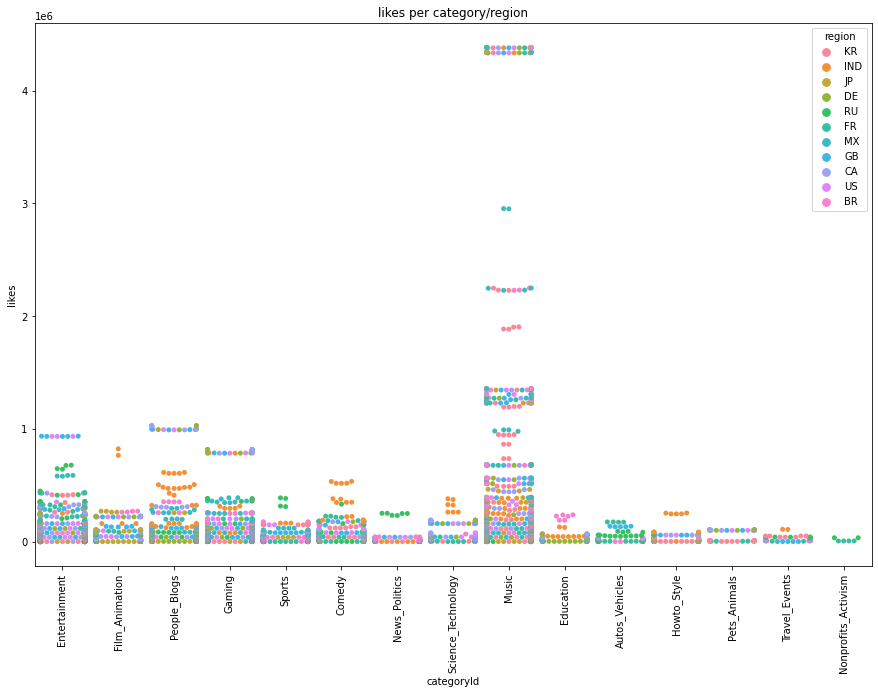

In [82]:
#fix the percentages
plt.figure(figsize=(15,10))
plt.title('likes per category/region')
plt.xticks(rotation=90)
sns.swarmplot(data=df,x=df.categoryId, y=df.likes,hue=df.region)
plt.show()

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9536 entries, 0 to 1951
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   index                    9536 non-null   int64              
 1   video_id                 9536 non-null   object             
 2   title                    9536 non-null   object             
 3   publishedAt              9536 non-null   datetime64[ns, UTC]
 4   channelTitle             9536 non-null   object             
 5   categoryId               9536 non-null   object             
 6   trending_date            9536 non-null   datetime64[ns, UTC]
 7   tags                     9536 non-null   object             
 8   view_count               9536 non-null   int64              
 9   likes                    9536 non-null   int64              
 10  comment_count            9536 non-null   int64              
 11  thumbnail_link           9536 

In [84]:
df.engagement.nunique()

8867

In [85]:
#watched and commented on the video
df[['engagement']]

,engagement
0,0.020506
600,0.139716
7215,0.031335
1752,0.021309
4106,0.108354
...,...
1151,0.148504
8814,0.085688
6047,0.125263
2751,0.006261


ValueError: Number of columns must be a positive integer, not 0

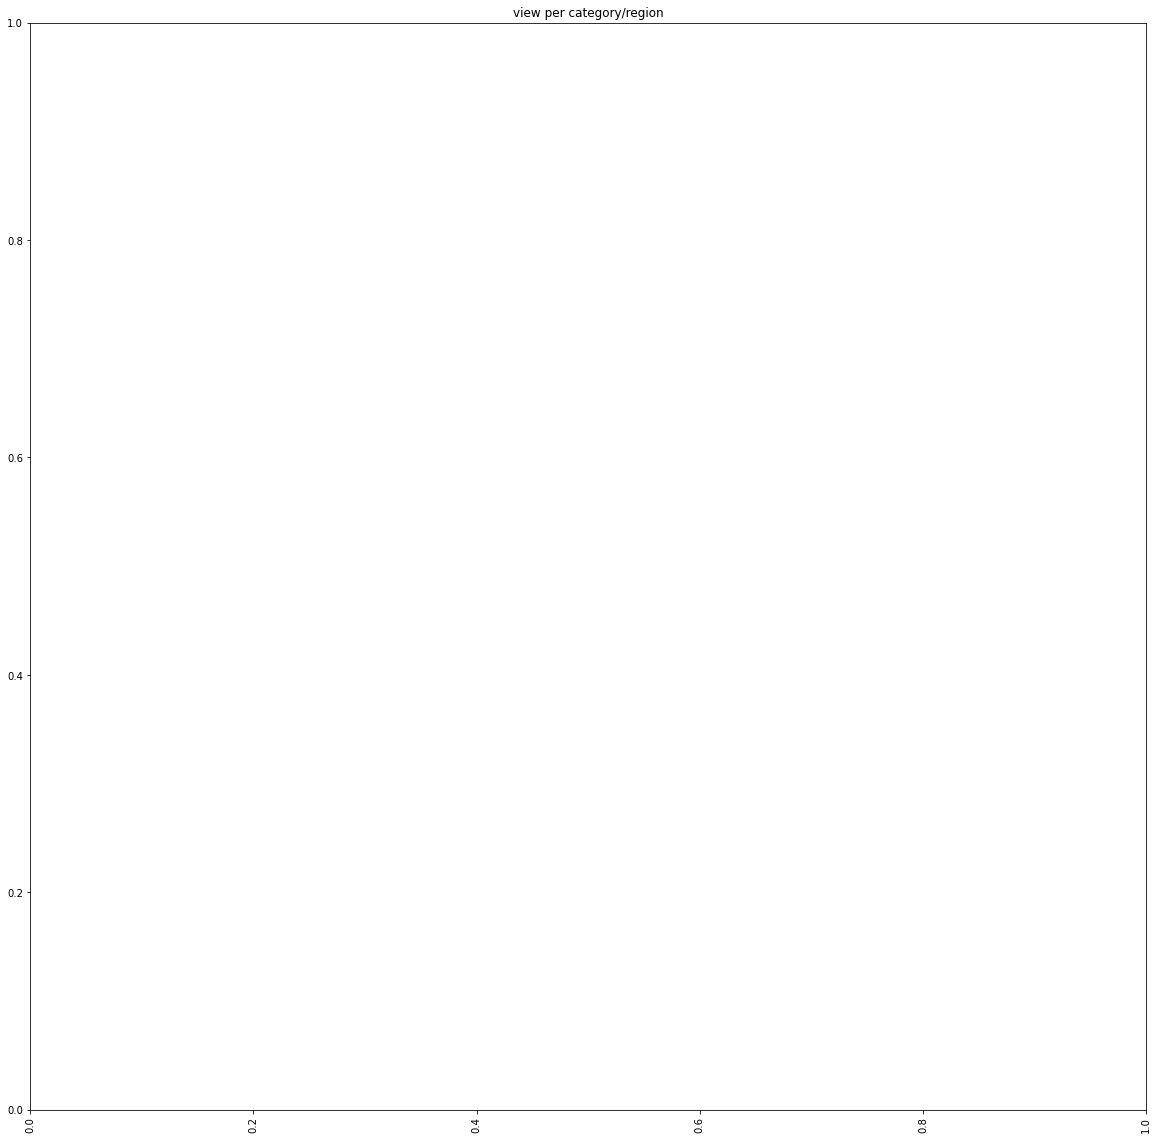

<Figure size 0x360 with 0 Axes>

In [132]:
#fix the percentages
plt.figure(figsize=(20,20))
plt.title('view per category/region')
plt.xticks(rotation=90)
sns.catplot(data=df,x='categoryId', y='engagement',col='region')

In [87]:
def plot_conf(ax, xlbl='', ylbl='', t='', back_color='#ffffff',
              text_color='#616161', grid_color='#e9e9e9', 
              tick_color='', ticklbl_size=9, lbl_size=11, lang='en'):
    """
    This function perform operations to produce better-looking 
    visualizations
    """
    # changing the background color of the plot
    ax.set_facecolor(back_color)
    # modifying the ticks on plot axes
    ax.tick_params(axis='both', labelcolor=text_color, color=back_color)
    if tick_color != '':
        ax.tick_params(axis='both', color=tick_color)
    ax.tick_params(axis='both', which='major', labelsize=ticklbl_size)
    # adding a grid and specifying its color
    ax.grid(True, color=grid_color)
    # making the grid appear behind the graph elements
    ax.set_axisbelow(True)
    # hiding axes
    ax.spines['bottom'].set_color(back_color)
    ax.spines['top'].set_color(back_color) 
    ax.spines['right'].set_color(back_color)
    ax.spines['left'].set_color(back_color)
    # setting the title, x label, and y label of the plot
    if lang == 'ar':
        ax.set_title(get_display(reshaper.reshape(t)), fontweight='bold', family='Amiri',
                     fontsize=14, color=text_color, loc='right', pad=24);
        ax.set_xlabel(get_display(reshaper.reshape(xlbl)), fontweight='bold', family='Amiri',
                      labelpad=16, fontsize=lbl_size, color=text_color, fontstyle='italic');
        ax.set_ylabel(get_display(reshaper.reshape(ylbl)), fontweight='bold', family='Amiri',
                      color=text_color, labelpad=16, fontsize=lbl_size, fontstyle='italic');
    else:
        ax.set_title(t, fontsize=14, color='#616161', loc='left', pad=24, fontweight='bold');
        ax.set_xlabel(xlbl, labelpad=16, fontsize=lbl_size, color='#616161', fontstyle='italic');
        ax.set_ylabel(ylbl, color='#616161', labelpad=16, fontsize=lbl_size, fontstyle='italic');

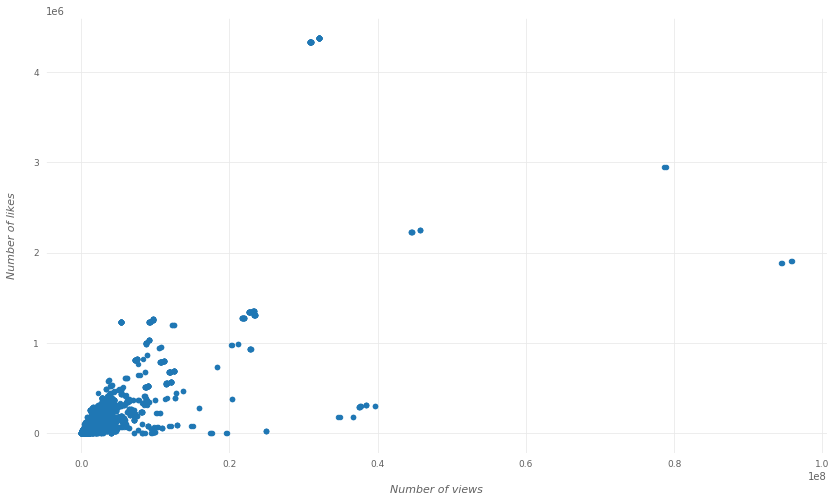

In [88]:
ax = df.plot(kind='scatter', x='view_count', y='likes', figsize=(14,8))
plot_conf(ax, xlbl='Number of views', ylbl='Number of likes')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


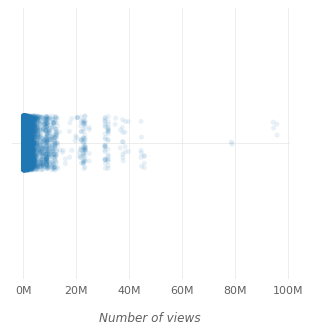

In [89]:
from matplotlib import ticker
fig, ax = plt.subplots(figsize=(5,5))
sns.stripplot(df['view_count'], alpha=0.1, ax=ax);
plot_conf(ax, xlbl='Number of views', ticklbl_size=11, lbl_size=12)
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}M'.format(x/1e6))
ax.xaxis.set_major_formatter(formatter)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


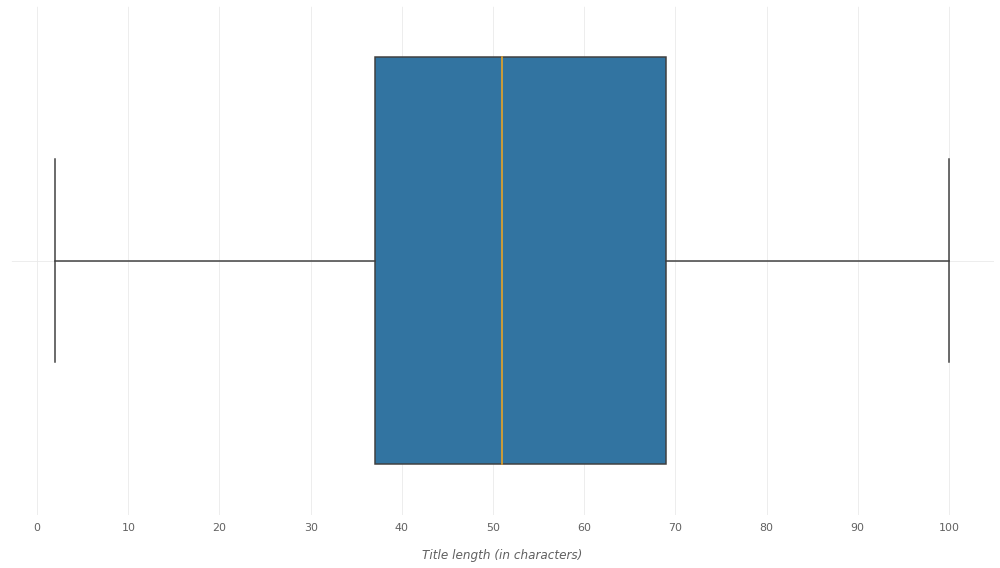

In [90]:
title_lengths = df["title"].apply(lambda x: len(x))
fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(title_lengths, medianprops={'color': '#FBA91A'}, ax=ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plot_conf(ax, xlbl='Title length (in characters)', ticklbl_size=11, lbl_size=12)
plt.tight_layout()

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9536 entries, 0 to 1951
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   index                    9536 non-null   int64              
 1   video_id                 9536 non-null   object             
 2   title                    9536 non-null   object             
 3   publishedAt              9536 non-null   datetime64[ns, UTC]
 4   channelTitle             9536 non-null   object             
 5   categoryId               9536 non-null   object             
 6   trending_date            9536 non-null   datetime64[ns, UTC]
 7   tags                     9536 non-null   object             
 8   view_count               9536 non-null   int64              
 9   likes                    9536 non-null   int64              
 10  comment_count            9536 non-null   int64              
 11  thumbnail_link           9536 

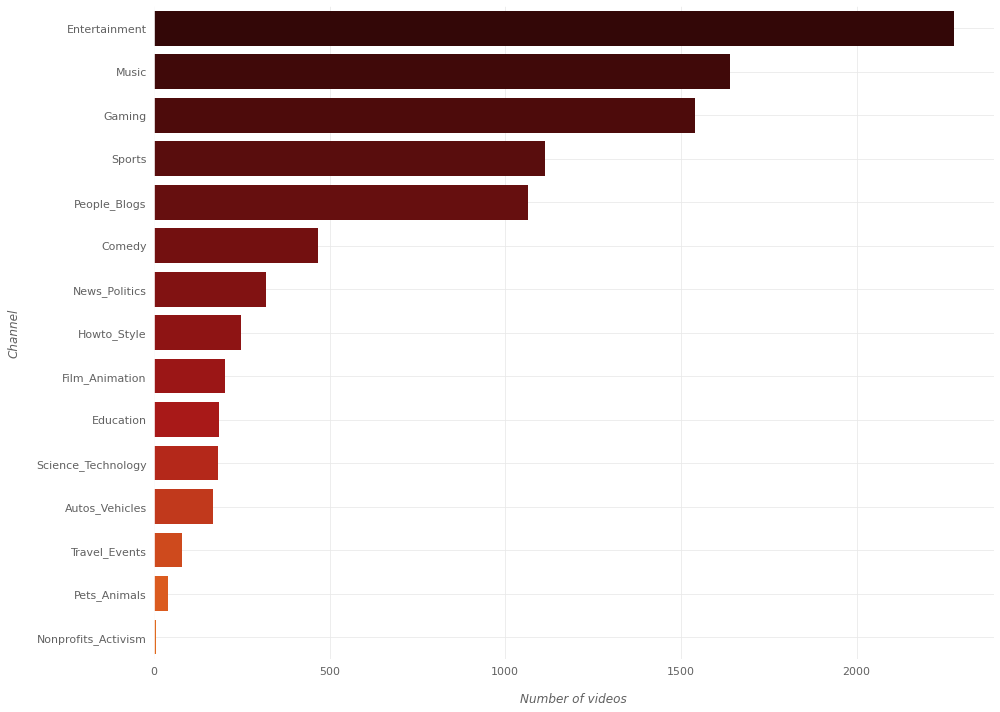

In [194]:
tdf = df.groupby("categoryId").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)
fig, ax = plt.subplots(figsize=(14,10))
sns.barplot(x="video_count", y="categoryId", data=tdf,
            palette=sns.color_palette('gist_heat', n_colors=25)[3:], ax=ax);
plot_conf(ax, xlbl='Number of videos', ylbl='Channel', ticklbl_size=11, lbl_size=12)
plt.tight_layout()

In [92]:
df


,index,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,...,num_of_tags,word_bank,cleaned_tags,cleaned_desc,title_in_description,title_in_tags,pct_tags_in_description,clean,stemmed,lemmatized
0,0,sWwHWK7OYJ8,[ENG][아형✪하이라이트] (여자)아이들 완전체 떴다↗ 멋짐 폭발♥ 5인 5색 토...,2022-10-29 13:26:44+00:00,아는형님 Knowingbros,Entertainment,2022-11-02 00:00:00+00:00,아는 형님 형님 형님 학교 미연 민니 소연 우기 슈화 아이들 여자아이들 강호동 이수...,1098919,19090,...,67,"[[, 아형, ✪, 하이라이트, 여자)아이들, 완전체, 떴다, ↗, 멋짐, 폭발, ...","{아이들저작권, 슈화직캠, Nxde직캠 Node, 여자아이들아는형님 아이들아는형님 ...","{50분, 공홈에서, 토요일, 토크 모음.zip#아는형님, 리플레이, 5색, 모음....",0,0,0.013889,5 5 zip httpstvjtbccokrjtbcbros httpstvingonel...,5 5 zip httpstvjtbccokrjtbcbro httpstvingoneli...,5 5 zip httpstvjtbccokrjtbcbros httpstvingonel...
600,0,4xl9KfUg8Lc,Pathaan | Official Teaser | Shah Rukh Khan | D...,2022-11-02 05:31:19+00:00,YRF,Film_Animation,2022-11-02 00:00:00+00:00,shah rukh khan shahrukh khan srk shah rukh kha...,7638460,764869,...,23,"[special, surprise, for, very, special, day, P...","{srk, deepika, shahrukh, अब्राहम, bollywood, 2...","{NewMovie2023, Instagram: Instagram/yrf► Visit...",0,0,0.013889,special surprise special day pathaan teaser ce...,special surpris special day pathaan teaser cel...,special surprise special day pathaan teaser ce...
7215,0,vzxI6U_l72g,ヒカルくんとようやく戦えるときが来ました。,2022-10-31 10:30:10+00:00,ロードシルク,People_Blogs,2022-11-02 00:00:00+00:00,シルクロード ロードシルク Fischer’s フィッシャーズ 個人 チャンネル 個チャン ...,613365,15756,...,32,[ヒカルくんhttps://www.youtube.com/channel/UCaminwG...,"{大乱闘, ルキナ, 漫画, 特技, スマブラSP, 爬虫類, Fischer, スマブラ,...","{http://www.epidemicsound.com【一部の動画・静止画素材提供元, ...",0,0,0.013889,httpswwwyoutubecomchannelucaminwg9mto4slyec3s6...,httpswwwyoutubecomchannelucaminwg9mto4slyec3s6...,httpswwwyoutubecomchannelucaminwg9mto4slyec3s6...
1752,0,AcznL5daQvA,Fear PIRATE CHAMPION's Spear! Clash of Clans S...,2022-11-01 08:00:04+00:00,Clash of Clans,Gaming,2022-11-02 00:00:00+00:00,clash of clans COC Clash of Clans Gameplay Cla...,2258144,44366,...,28,"[Ahoy, ⚓, new, month, of, Season, Challenges, ...","{season, rama, Town, Gameplay, Wars, pirate, r...","{mighty, en, favorite, parents#clashofclans, m...",0,0,0.013889,ahoy new month season challenges better steer ...,ahoy new month season challeng better steer cl...,ahoy new month season challenge better steer c...
4106,0,ZYO1Z4Ajdvw,ЗА МНОЙ СЛЕДИЛИ?! ТОТ САМЫЙ ЛЕС В ЯПОНИИ! Ghos...,2022-10-31 20:54:41+00:00,Дима Масленников (Pognali Show),Entertainment,2022-11-02 00:00:00+00:00,ЗА МНОЙ СЛЕДИЛИ?! ТОТ САМЫЙ ЛЕС В ЯПОНИИ ТОТ С...,3552774,325414,...,32,"[Оформи, подписку, на, VK, Музыку, за, 0, рубл...","{GHOSTBUSTER, лесу, камеру, В, ghostbusters, М...","{за, рублей, 0, https://vk.com/pognalishowTik-...",0,0,0.013889,vk 0 httpsvkccchsqel httpsmusicvkcompromomtlin...,vk 0 httpsvkccchsqel httpsmusicvkcompromomtlin...,vk 0 httpsvkccchsqel httpsmusicvkcompromomtlin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,199,oi74-TJF5Aw,ZUM GLÜCK IST HEUTE MONTAG,2022-10-25 16:00:34+00:00,unsympathischTV,Entertainment,2022-11-02 00:00:00+00:00,eBay eBay Kleinanzeigen unsympathischTV,1198575,168493,...,3,"[TikToks, an, ichwillinsvideo@gmail.comMein, M...","{unsympathischTV, eBay, Kleinanzeigen}","{TikToks, für, Merch, Werbung, https://unsympa...",0,0,0.000000,tiktoks ichwillinsvideogmailcommein merch http...,tiktok ichwillinsvideogmailcommein merch https...,tiktoks ichwillinsvideogmailcommein merch http...
8814,199,hgmXXsS7Eiw,Peter Fox - Zukunft Pink | REACTION,2022-10-26 08:30:15+00:00,Jay Jiggy,Music,2022-11-02 00:00:00+00:00,peter fox zukunft pink peter fox zukunft pink ...,129750,9142,...,12,"[Peter, Fox, Zukunft, Pink, https://www.youtub...","{lyrics, reaction, zukunft, lied, official, pe...","{Playlist, euch, m, =, Fox, https://www.instag...",0,0,0.000000,peter fox zukunft pinkhttpswwwyoutubecomwatchv...,peter fox zukunft pinkhttpswwwyoutubecomwatchv...,peter fox zukunft pinkhttpswwwyoutubecomwatchv...
6047,199,4

In [93]:
df.region.unique()

array(['KR', 'IND', 'JP', 'DE', 'RU', 'FR', 'MX', 'GB', 'CA', 'US', 'BR'],
      dtype=object)

In [95]:
# making categorid into actual category titles
df.region = df.region.map({'IND': 'India', 'JP': ' Japan', 'DE':'Germany','FR':'France',
                                      'KR':'Korea','RU':'Russia','MX':'Mexico'
                          ,'BR':'Brazil','US':'United_States','CA':'Canada','GB':'United_Kingdon'})

In [106]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
def change_height(ax, new_value) :
    for patch in ax.patches :
        current_height = patch.get_height()
        diff = current_height - new_value

        # we change the bar width
        patch.set_height(new_value)

        # we recenter the bar
        patch.set_y(patch.get_y() + diff * .5)
        

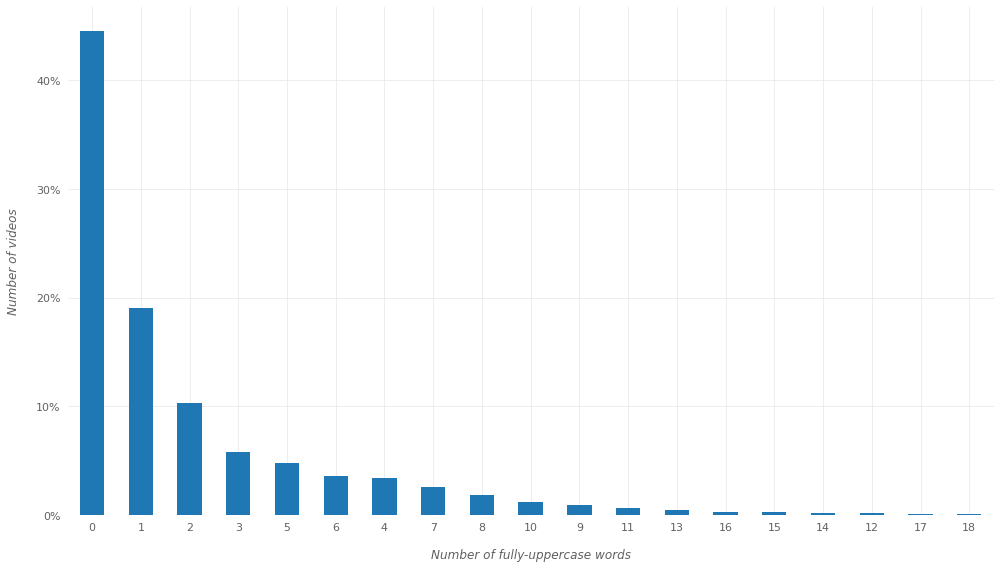

In [113]:
upper_counts = []
for t in df['title'].values:
    t = re.sub(r'[^\w]', ' ', t)
    t = t.split()
    c = 0
    for w in t:
        if w.isalpha() and w.isupper():
            c += 1
    upper_counts.append(c)


ax = (pd.Series(upper_counts).value_counts(normalize=True) * 100).plot(
    kind='bar', figsize=(14,8), rot=0)
plot_conf(ax, xlbl='Number of fully-uppercase words', ylbl='Number of videos', ticklbl_size=11, lbl_size=12)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}%'))
plt.tight_layout()

In [115]:
import pandas as pd
import numpy as np
import os
import requests
from matplotlib import pyplot as plt
from matplotlib import ticker
import matplotlib.colors as mc
import seaborn as sns
from IPython.display import HTML
import re
from collections import Counter
import wordcloud
from pprint import pprint
import random
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk import download as nltk_download
from PIL import Image
import emoji
import tempfile
import io
from PIL import Image
import time
from scipy.spatial import distance
from skimage import color as skcolor

In [135]:
# source: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

nltk_download('stopwords')

# if a contraction has more than one possible expanded forms, we replace it 
# with a list of these possible forms
tmp = {}
for k,v in contractions.items():
    if "/" in v:
        tmp[k] = [x.strip() for x in v.split(sep="/")]
    else:
        tmp[k] = v
contractions = tmp

tokenizer = RegexpTokenizer(r"[\w']+")

all_titles = ' '.join([x.lower() for x in df['title']])
for k,v in contractions.items():
    if isinstance(v, list):
        v = random.choice(v)
    all_titles = all_titles.replace(k.lower(), v.lower())
    
words = list(tokenizer.tokenize(all_titles))
words_excl_stopwords = [x for x in words if x not in stopwords.words('english')]
WC_MAX_FZ = 400 
WC_RS = 0.5

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cristianibarra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


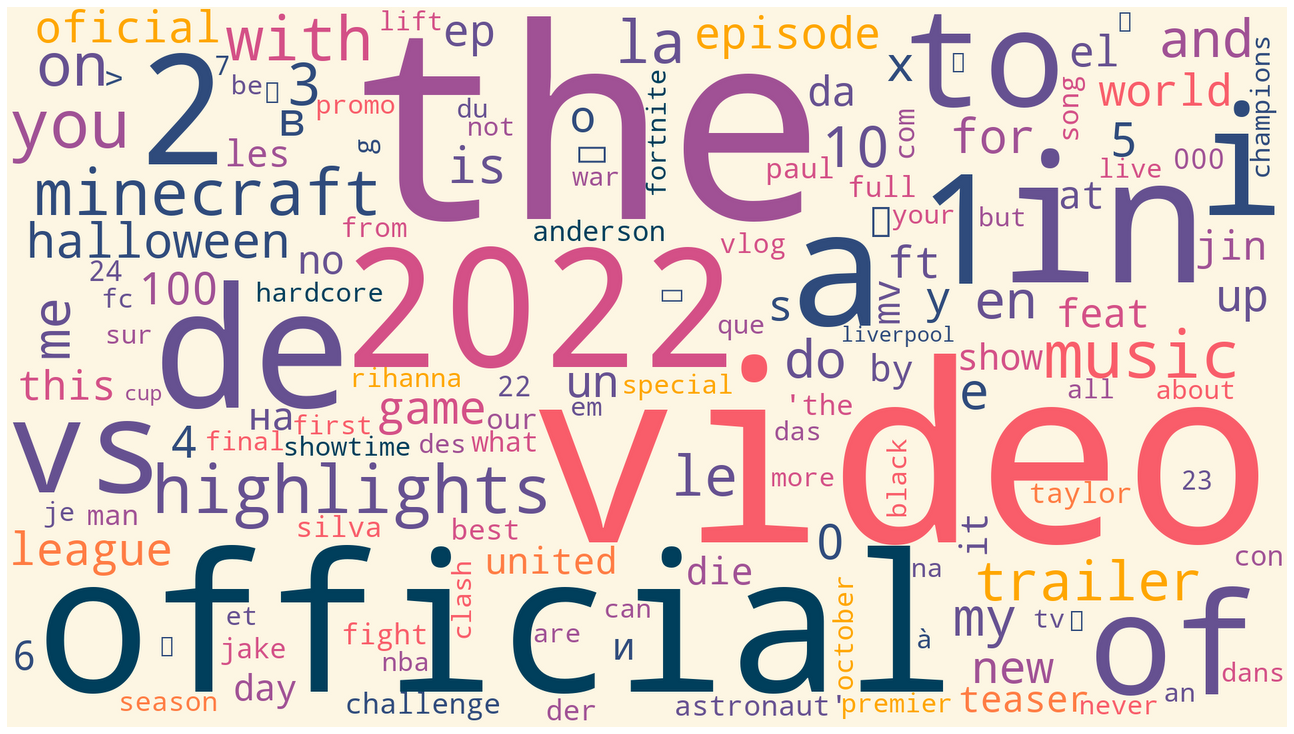

In [139]:
def col_func(word, font_size, position, orientation, font_path, random_state):
    colors = ["#003f5c", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"]
    return colors[len(word)%len(colors)]

wc = wordcloud.WordCloud(width=1920, height=1080, collocations=False, 
                         background_color="#fdf6e3", color_func=col_func, 
                         max_words=150,random_state=25, max_font_size=WC_MAX_FZ, 
                         relative_scaling=WC_RS
                        ).generate_from_frequencies(dict(Counter(words)))

fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wc, interpolation='lanczos')
ax.axis("off")
plt.tight_layout(pad=0)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9536 entries, 0 to 1951
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   index                    9536 non-null   int64              
 1   video_id                 9536 non-null   object             
 2   title                    9536 non-null   object             
 3   publishedAt              9536 non-null   datetime64[ns, UTC]
 4   channelTitle             9536 non-null   object             
 5   categoryId               9536 non-null   object             
 6   trending_date            9536 non-null   datetime64[ns, UTC]
 7   tags                     9536 non-null   object             
 8   view_count               9536 non-null   int64              
 9   likes                    9536 non-null   int64              
 10  comment_count            9536 non-null   int64              
 11  thumbnail_link           9536 

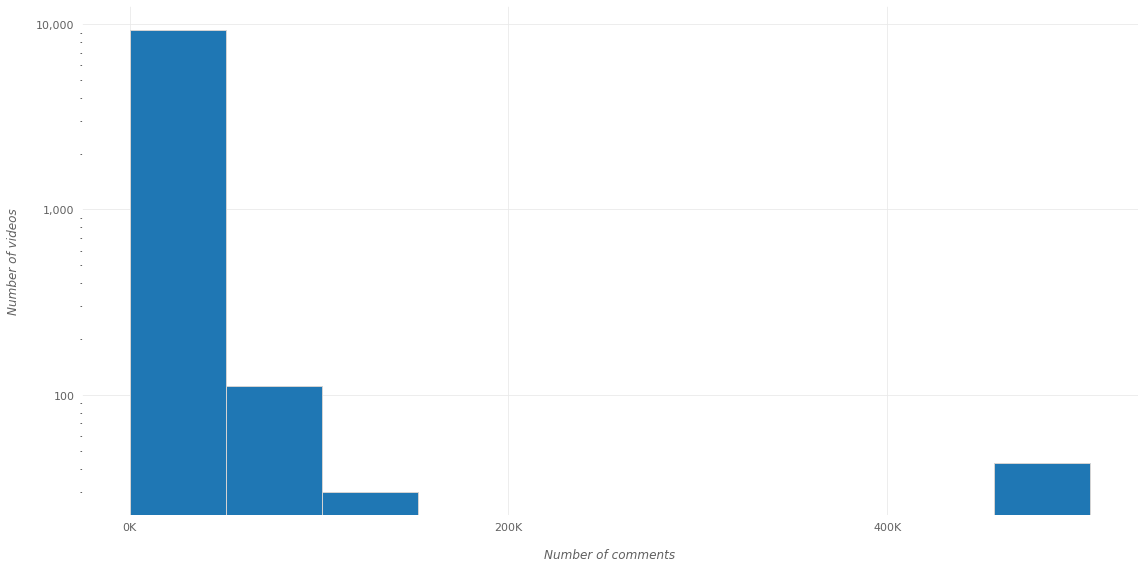

In [130]:
ax = df['comment_count'].plot(kind='hist', figsize=(16,8), 
                           logy=True, lw=1, ec='lightgray');
plot_conf(ax, xlbl='Number of comments', ylbl='Number of videos', ticklbl_size=11, lbl_size=12)
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}K'.format(x/1e3))
ax.xaxis.set_major_locator(ticker.MultipleLocator(200000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()

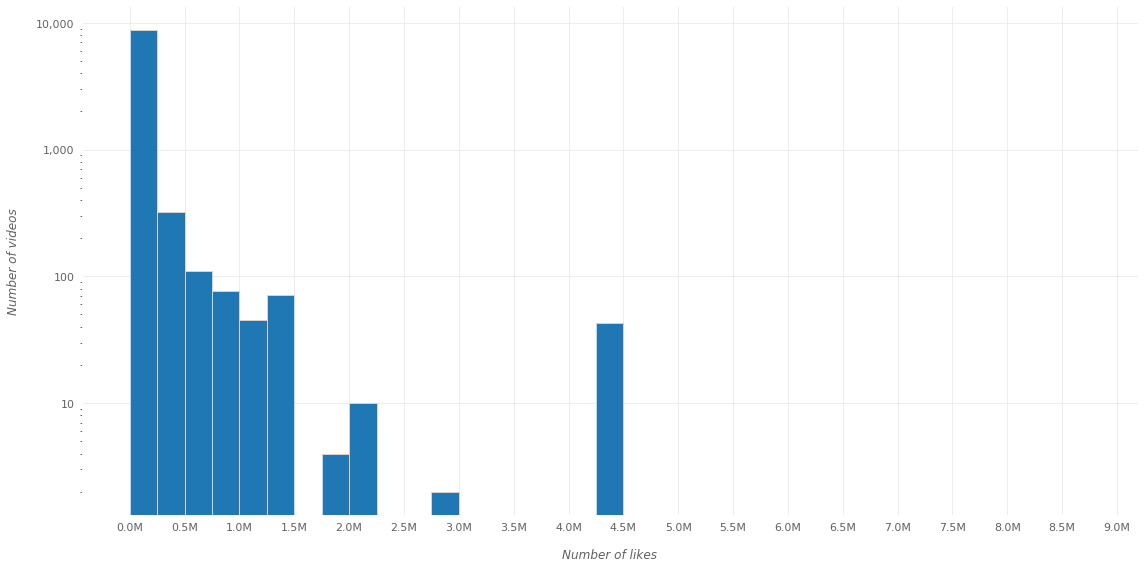

In [131]:
ax = df['likes'].plot(kind='hist', bins=np.arange(0, 9e6, 2.5e5)-0.5, figsize=(16,8), 
                           logy=True, lw=1, ec='lightgray');
plot_conf(ax, xlbl='Number of likes', ylbl='Number of videos', ticklbl_size=11, lbl_size=12)
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.1f}M'.format(x/1e6))
ax.xaxis.set_major_locator(ticker.MultipleLocator(500000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()


In [133]:
def create_vaults(df):        #these vaults are to create the word clouds for each portion
    word_vault = list()
    for row in df.index:
        word_vault.extend(df.iloc[row].word_bank)
    top_25_words = list()
    for row in df[df.top_25==1].index:
        top_25_words.extend(df[df.top_25==1].iloc[row].word_bank)
    outside_25_words = list()
    for row in df[df.top_25!=1].index:
        outside_25_words.extend(df[df.top_25!=1].iloc[row].word_bank)
    return word_vault, top_25_words, outside_25_words

In [134]:
create_vaults(df)

IndexError: single positional indexer is out-of-bounds

In [158]:
def chi2_for_lang(df):
    ''' 
    input the df dataset, string of the target, and a list of featues to run through
    does a chi2 test for indepenance (proportionality) and plots the results
    no return
    '''
    # creates a column of the payments for easy analysis, runs a crosstab to put into a chi2 independancy test.
    # produces observed and expected values
    # returns the chi2 and pval for the whole set
    import scipy.stats as stats

    target="comments_disabled"

    df = pd.crosstab(df[target].unique()columns=
    for row in df1.index:
        for col in df1.columns:
            df1[col].loc[row] = df[df[target]==row][col].sum()

    chi2, p, degf, expected = stats.chi2_contingency(df1)

    alpha = .05
    H0 = (f"Languages is not different in the distribution of Common Unique Count")
    H1 = (f"Languages is different in the distribution of Common Unique Count")
    #print('Observed')
    #print(df1.values)
    #print('---\nExpected')
    dfexpected = df.copy()
    for i in range(len(dfexpected)):
        dfexpected.iloc[i] = expected[i]
    #print(dfexpected.values)
    print(f'---\nchi^2 = {chi2:.4f}, p = {p:.5f}, degf = {degf}')
    if p>alpha:
        print(f"due to p={p:.5f} > α={alpha} we fail to reject our null hypothesis\n({H0})")
    else:
        print(f"due to p = {p:.5f} < α = {alpha} we reject our null hypothesis\n( ", '\u0336'.join(H0) + '\u0336' , ")")

    #plot the results
    plt.figure(figsize=(24,10))
    plt.suptitle(f"Common Unique Words in Language for each Language", fontsize=16, y=0.99)

    for x,col in enumerate(df1.T.columns):
        ax = plt.subplot(2,3,x+1)
        pd.concat({'Expected': dfexpected.T[col], 'Observed': df1.T[col]}, axis=1).\
            plot.barh(color={"Observed": "grey", "Expected": "pink"}, edgecolor="black",ax=ax)
        ax.set_ylabel("Count")
        ax.set_title(f'{col} values') # Title with column name.
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.8,
                    hspace=0.4)
    plt.show()



SyntaxError: invalid syntax (328782122.py, line 14)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9536 entries, 0 to 1951
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   index                    9536 non-null   int64              
 1   video_id                 9536 non-null   object             
 2   title                    9536 non-null   object             
 3   publishedAt              9536 non-null   datetime64[ns, UTC]
 4   channelTitle             9536 non-null   object             
 5   categoryId               9536 non-null   object             
 6   trending_date            9536 non-null   datetime64[ns, UTC]
 7   tags                     9536 non-null   object             
 8   view_count               9536 non-null   int64              
 9   likes                    9536 non-null   int64              
 10  comment_count            9536 non-null   int64              
 11  thumbnail_link           9536 

In [168]:
from scipy import stats
def comments_stats(train):
    '''chi test comparing bedroom and log error'''
    x = train.comments_disabled
    y = train.likes

    alternative_hypothesis = 'comments_disabled is related to likes'
    alpha = .05

    corr, p = stats.pearsonr(x, y)

    corr, p

    if p < alpha:
        print("We reject the null hypothesis")
        print("We can say that we have confidence that", alternative_hypothesis)
    else:
        print("We fail to reject the null")

In [167]:
squarefeet_stats(df)

We reject the null hypothesis
We can say that we have confidence that comments_disabled is related to likes


In [172]:
#anova
def comments_stats(train):  
    from scipy import stats
    alternative_hypothesis = 'comments_disabled is related to likes'
    alpha = .05
    f, p = stats.f_oneway(train.comments_disabled, train.view_count)
    if p < alpha:
        print("We reject the null hypothesis")
        print("We can say that we have confidence that", alternative_hypothesis)
    else:
        print("We fail to reject the null")

In [173]:
comments_stats(df)

We reject the null hypothesis
We can say that we have confidence that comments_disabled is related to likes


In [176]:
x = df.comment_count
y = df.view_count
corr, p = stats.pearsonr(x, y)
corr, p


(0.5853435503269139, 0.0)

In [182]:
#anova
def comments_stats2(train):  
    from scipy import stats
    alternative_hypothesis = 'comment_count is related to view_count'
    alpha = .05
    x = train.comment_count
    y = train.view_count
    corr, p = stats.pearsonr(x, y)
    if p < alpha:
        print("We reject the null hypothesis")
        print("We can say that we have confidence that", alternative_hypothesis)
#         print(f'corr={corr},p={p}')
    else:
        print("We fail to reject the null")

In [183]:
comments_stats2(df)

We reject the null hypothesis
We can say that we have confidence that comment_count is related to view_count


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9536 entries, 0 to 1951
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   index                    9536 non-null   int64              
 1   video_id                 9536 non-null   object             
 2   title                    9536 non-null   object             
 3   publishedAt              9536 non-null   datetime64[ns, UTC]
 4   channelTitle             9536 non-null   object             
 5   categoryId               9536 non-null   object             
 6   trending_date            9536 non-null   datetime64[ns, UTC]
 7   tags                     9536 non-null   object             
 8   view_count               9536 non-null   int64              
 9   likes                    9536 non-null   int64              
 10  comment_count            9536 non-null   int64              
 11  thumbnail_link           9536 

/var/folders/48/yvmx1zqx06d_njrv4sh14c6m0000gn/T/ipykernel_21515/819296556.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['8','8mins','16mins','24mins','32mins','40mins','48mins','56mins'])


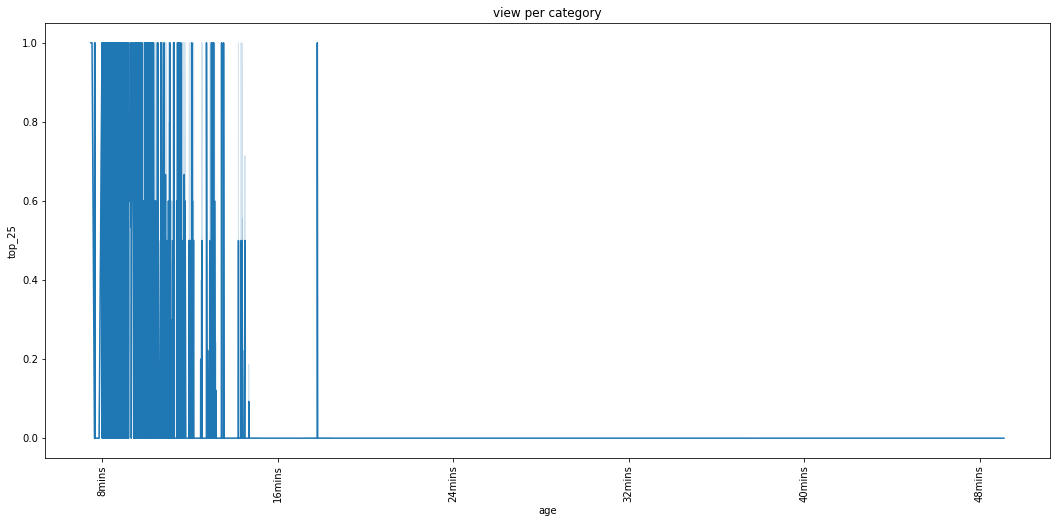

In [196]:
plt.figure(figsize=(18,8))
g=sns.lineplot(data=df,x='age',y='top_25')
plt.title('view per category')
g.set_xticklabels(['8','8mins','16mins','24mins','32mins','40mins','48mins','56mins'])
plt.xticks(rotation=90)
plt.show()

In [198]:
df.age.nunique()

1987

In [199]:
ax = df.age.groupby(df.age.index.hour).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='sale amount thru months', xlabel='Month', ylabel='Temp (F)')
plt.show()

AttributeError: 'Int64Index' object has no attribute 'hour'

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9536 entries, 0 to 1951
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   index                    9536 non-null   int64              
 1   video_id                 9536 non-null   object             
 2   title                    9536 non-null   object             
 3   publishedAt              9536 non-null   datetime64[ns, UTC]
 4   channelTitle             9536 non-null   object             
 5   categoryId               9536 non-null   object             
 6   trending_date            9536 non-null   datetime64[ns, UTC]
 7   tags                     9536 non-null   object             
 8   view_count               9536 non-null   int64              
 9   likes                    9536 non-null   int64              
 10  comment_count            9536 non-null   int64              
 11  thumbnail_link           9536 

In [208]:
df[['age']]

,age
0,3 days 10:33:16
600,-1 days +18:28:41
7215,1 days 13:29:50
1752,0 days 15:59:56
4106,1 days 03:05:19
...,...
1151,7 days 07:59:26
8814,6 days 15:29:45
6047,7 days 01:40:21
2751,19 days 10:59:28


In [207]:
df.groupby(df["age"].dt.hour)["value"].mean().plot(kind='bar', rot=0, ax=axs)

AttributeError: 'TimedeltaProperties' object has no attribute 'hour'

<AxesSubplot:>

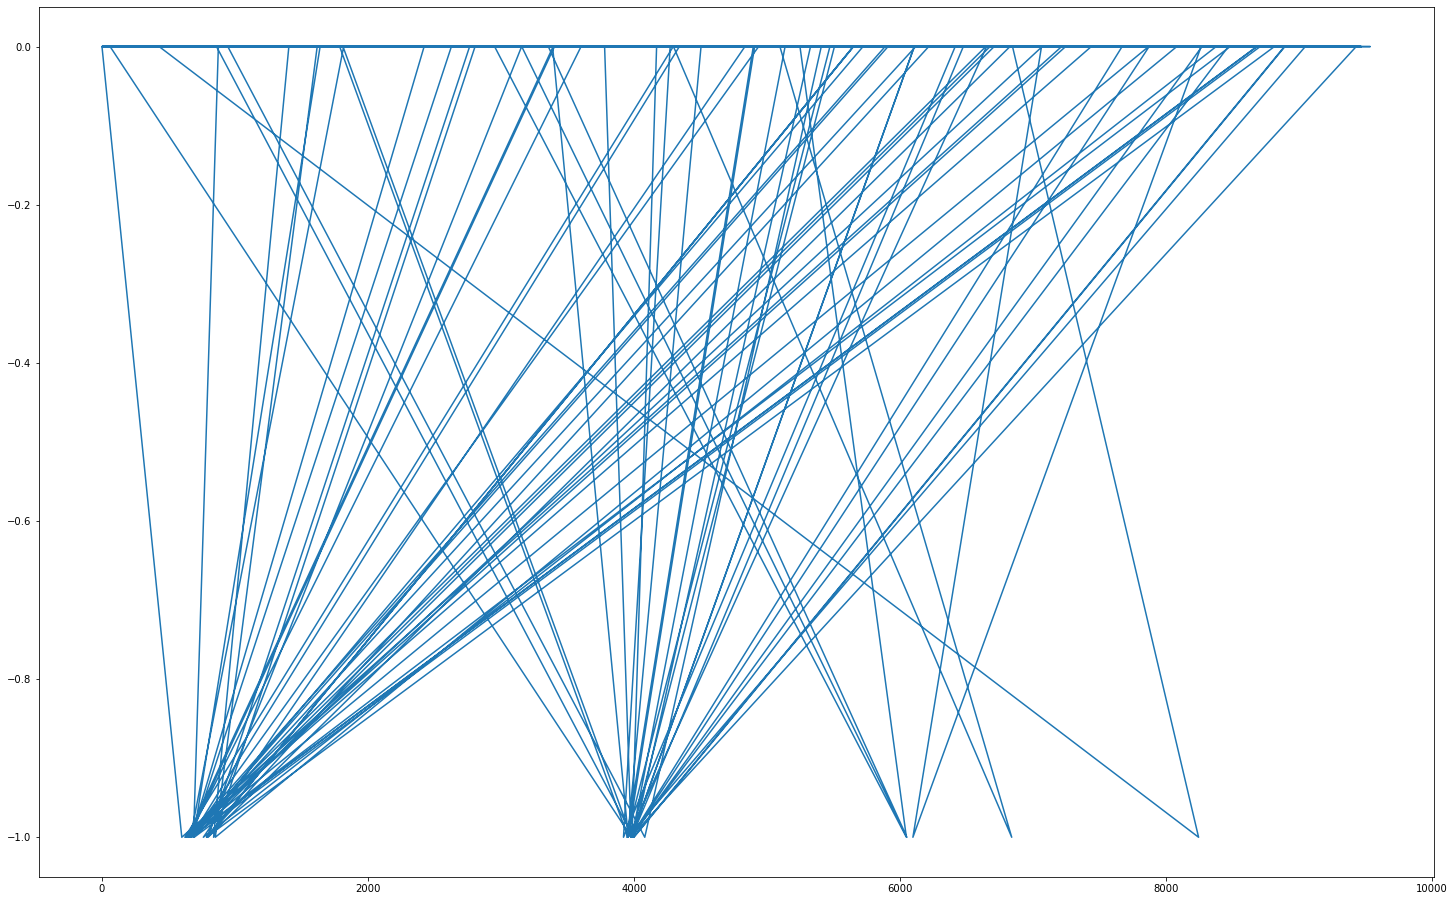

In [217]:
df['age'].astype('timedelta64[Y]').plot.line()

In [218]:
 df['age'].resample('H').mean() 

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'